In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data path
%cd drive/MyDrive/Università/MML/src

/content/drive/.shortcut-targets-by-id/1u3d7lx2LDyk79C7onsFsAOBdF3DXtFBz/MML/src


# **Introduction**
In this project we work with a Bank Marketing Data Set related with marketing camapigns of a Portuguese banking institution. The marketing campaigns were based on phone calls and more than one contact to the same client was required. In particular, it is a binary classification problem where the goal is to predict whether a client will subscribe a term deposit.
The Data Set can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), whereas the code can be found on [GitHub](https://github.com/AndreaGhiglione/mathematics-machine-learning).


# **Data**
We were provided with 4 datasets as comma-separated values files:


*   ***bank-additional-full.csv*** : it is a dataset with 41188 records, 19 features and the target variable.
*   ***bank-additional.csv*** : it is a randomly subset of the above dataset, in particular 10% of the records are present.
*   ***bank-full.csv*** : it is a dataset with 45211 records, 16 features and the target variable.
*   ***bank.csv*** : it is a randomly selected subset of the above dataset, in particulare 10% of the records are present.

Smaller dataset version are available for testing more computationally demanding models, such as *SVM*.

# **Software and tools**
For this project we worked with **Python**, one of the most popular programming languages and widely used in Data Science and Machine Learning fields. We exploited free computational resources on **Google Colaboratory** which also allowed us to enrich the analysis with *LaTeX, HTML* and images.

We used a set of libraries which are summarized below:


*   **NumPy:** Numerical Python, library which handles n-dimensional arrays through vectorization, indexing and broadcasting concepts. Extremely user-friendly and strong computing tool.
*   **Pandas:** Library useful for data analysis and manipulation of data in tabular format.
*   **Matplotlib:** Library for creating animated and interactive visualizations in Python. Extremely useful for communicate results through visual perception.
*   **Seaborn:** Library for data visualization based on Matplotlib. More suitable for visualizing data with certain plots.
*   **Scikit-learn:** Library tailored for Machine Learning and an efficient tool for predictive data analysis.
*   **SciPy:** Library for algorithms and mathematical tools for the Python language. Extremely useful for optimization, algebraic operations, statistics, etc.
* **Imblearn:** Imbalanced-learn, library which provides tools for dealing with classification for imbalanced dataset.
* **OpenCV:** Real-time optimized Computer Vision library, useful for loading images. 
* **Category_encoders:** Library with a set of sklearn-like set encoders to handle categorical features with different techniques.
* **Statsmodels:** Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
* **Tqdm:** Library to show a smart progress meter on iterables.

In [ ]:
!pip install -U imbalanced-learn
!pip install category_encoders
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 13.4 MB/s 
     |████████████████████████████████| 199 kB 48.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import cv2
import category_encoders
import statsmodels.api as sm
from scipy import stats, sparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from tqdm.notebook import tqdm
from sklearn.tree import export_graphviz

# **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv("data/bank-full.csv", sep=";")

In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

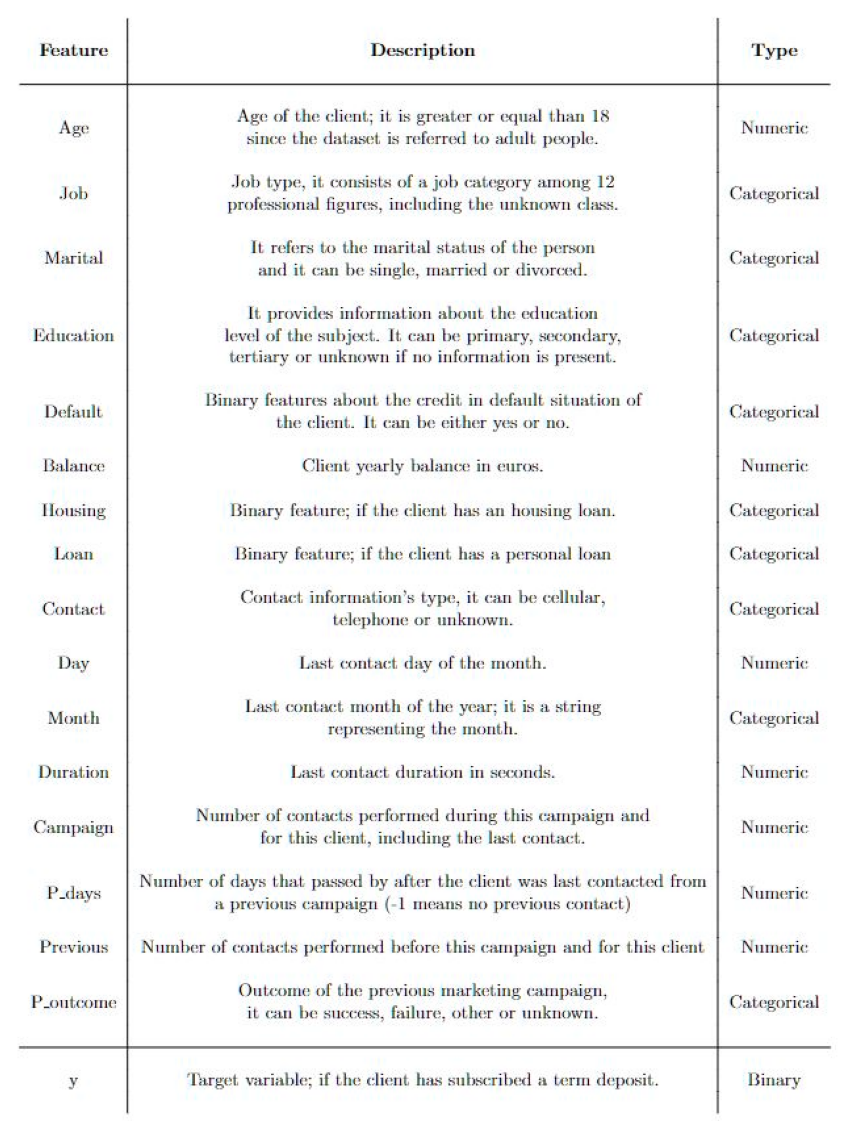

In [ ]:
# just for visualization on colab: table we have on latex (better quality there)
plt.figure(figsize=(15,25))
plt.imshow(cv2.imread('images/table_features.JPG'))
plt.axis('off')
plt.show()

In [ ]:
numerical_features = df.iloc[:,:-1]._get_numeric_data().columns.values
categorical_features = [feat for feat in df.iloc[:,:-1].columns.values if feat not in numerical_features]

First, we analyze categorical features and the corresponding values of the target variable by means of stacked bar plots.

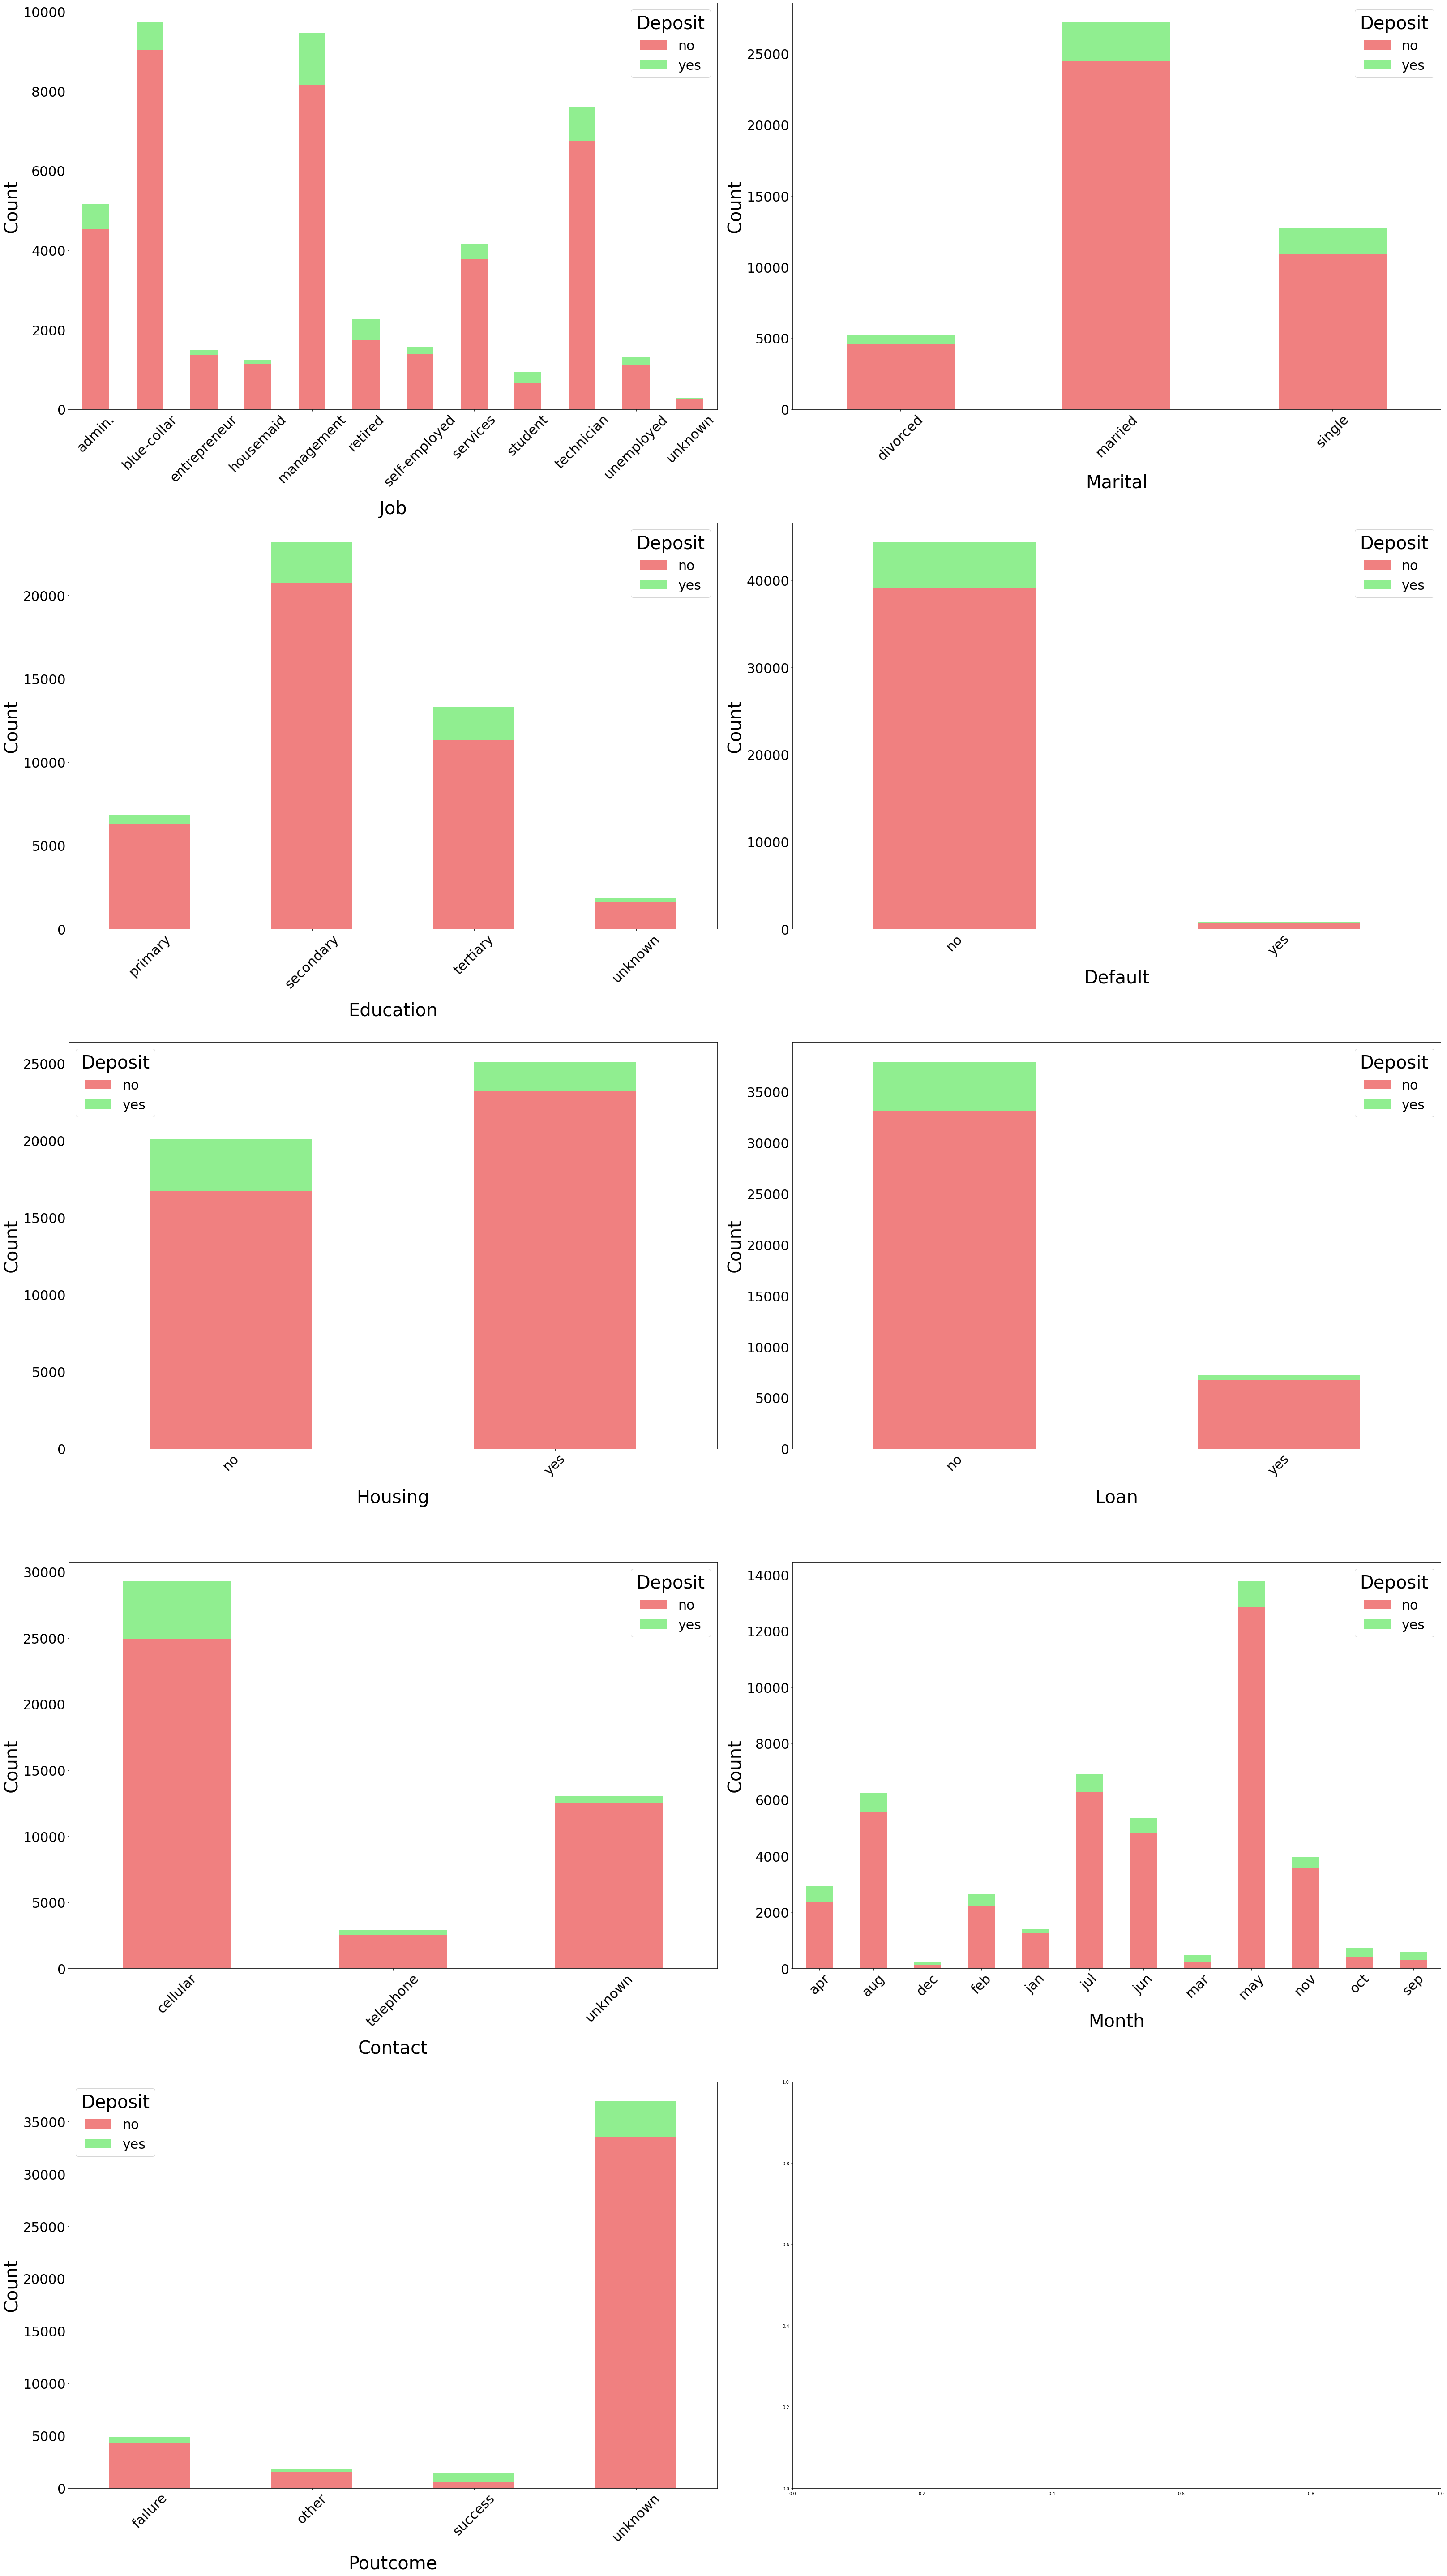

In [ ]:
custom_colors = ['lightcoral', 'lightgreen']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_colors)

x_size, y_size = 5, 2
fig,axes = plt.subplots(x_size, y_size, figsize=(45,80))
for i in range(x_size):
    for j in range(y_size):
        id = i * y_size + j
        if id == len(categorical_features):
            break
        c_feat = categorical_features[id]
        df_grp = df.groupby([c_feat, 'y'])[c_feat].count().unstack('y').fillna(0)
        df_grp.plot(ax=axes[i, j], kind='bar', stacked=True)
        axes[i, j].set_xlabel(c_feat.capitalize(), fontsize=40, labelpad=25)
        axes[i, j].set_ylabel('Count', fontsize=40)
        axes[i, j].xaxis.set_tick_params(labelsize=30, rotation=45)
        axes[i, j].yaxis.set_tick_params(labelsize=30)
        axes[i, j].legend(title='Deposit', title_fontsize=40, fontsize=30)

fig.tight_layout()

From the plots we can see that the percentage of people who subscribed a long term deposit is generally low, but we could expect that since it is the result of bank telemarketing which will capture a limited amount of the people called. In particular, analyzing the **job** we can see that the majority of people who subscribed are students, retired and unemployed people. The **marital** status instead shows that single people are the most likely to subscribe a deposit. Looking at **education** tertiary and unknown are on the top, however this is not ideal since we understand that people with a degree subscribed a lot, but also people who we don't know about their education. The people with credit in **default** almost double people without it. Furthermore, both people without **housing** loan and general **loan** subscribed much more than people with them. Looking at the **contact** it does not make a lot of difference if people gave a cellular or a telephone because who did that subscribed much more with respect to people who this information is unknown (probably not provided). The last contact **month** of the year shows that people contacted in March are the one who subscribed the most; this is interesting since other top positions are about winter months for the most. Finally, the last contact **day** of the month does not carry a lot of information, except for the fact that the peak of subscribed people is reached on the first day of the month.

In [ ]:
# if you want to inspect a specific feature in terms of % ratio yes/no
c_feat = 'job'
df_grp = df.groupby([c_feat, 'y'])[c_feat].count().unstack('y').fillna(0)
df_grp['ratio'] = round(df_grp['yes'] / df_grp['no'] * 100, 2)
df_grp.sort_values(by=['ratio'], ascending=False)

y                no   yes  ratio
job                             
student         669   269  40.21
retired        1748   516  29.52
unemployed     1101   202  18.35
management     8157  1301  15.95
admin.         4540   631  13.90
self-employed  1392   187  13.43
unknown         254    34  13.39
technician     6757   840  12.43
services       3785   369   9.75
housemaid      1131   109   9.64
entrepreneur   1364   123   9.02
blue-collar    9024   708   7.85

Then, we analyze numerical features by means of violin plots.

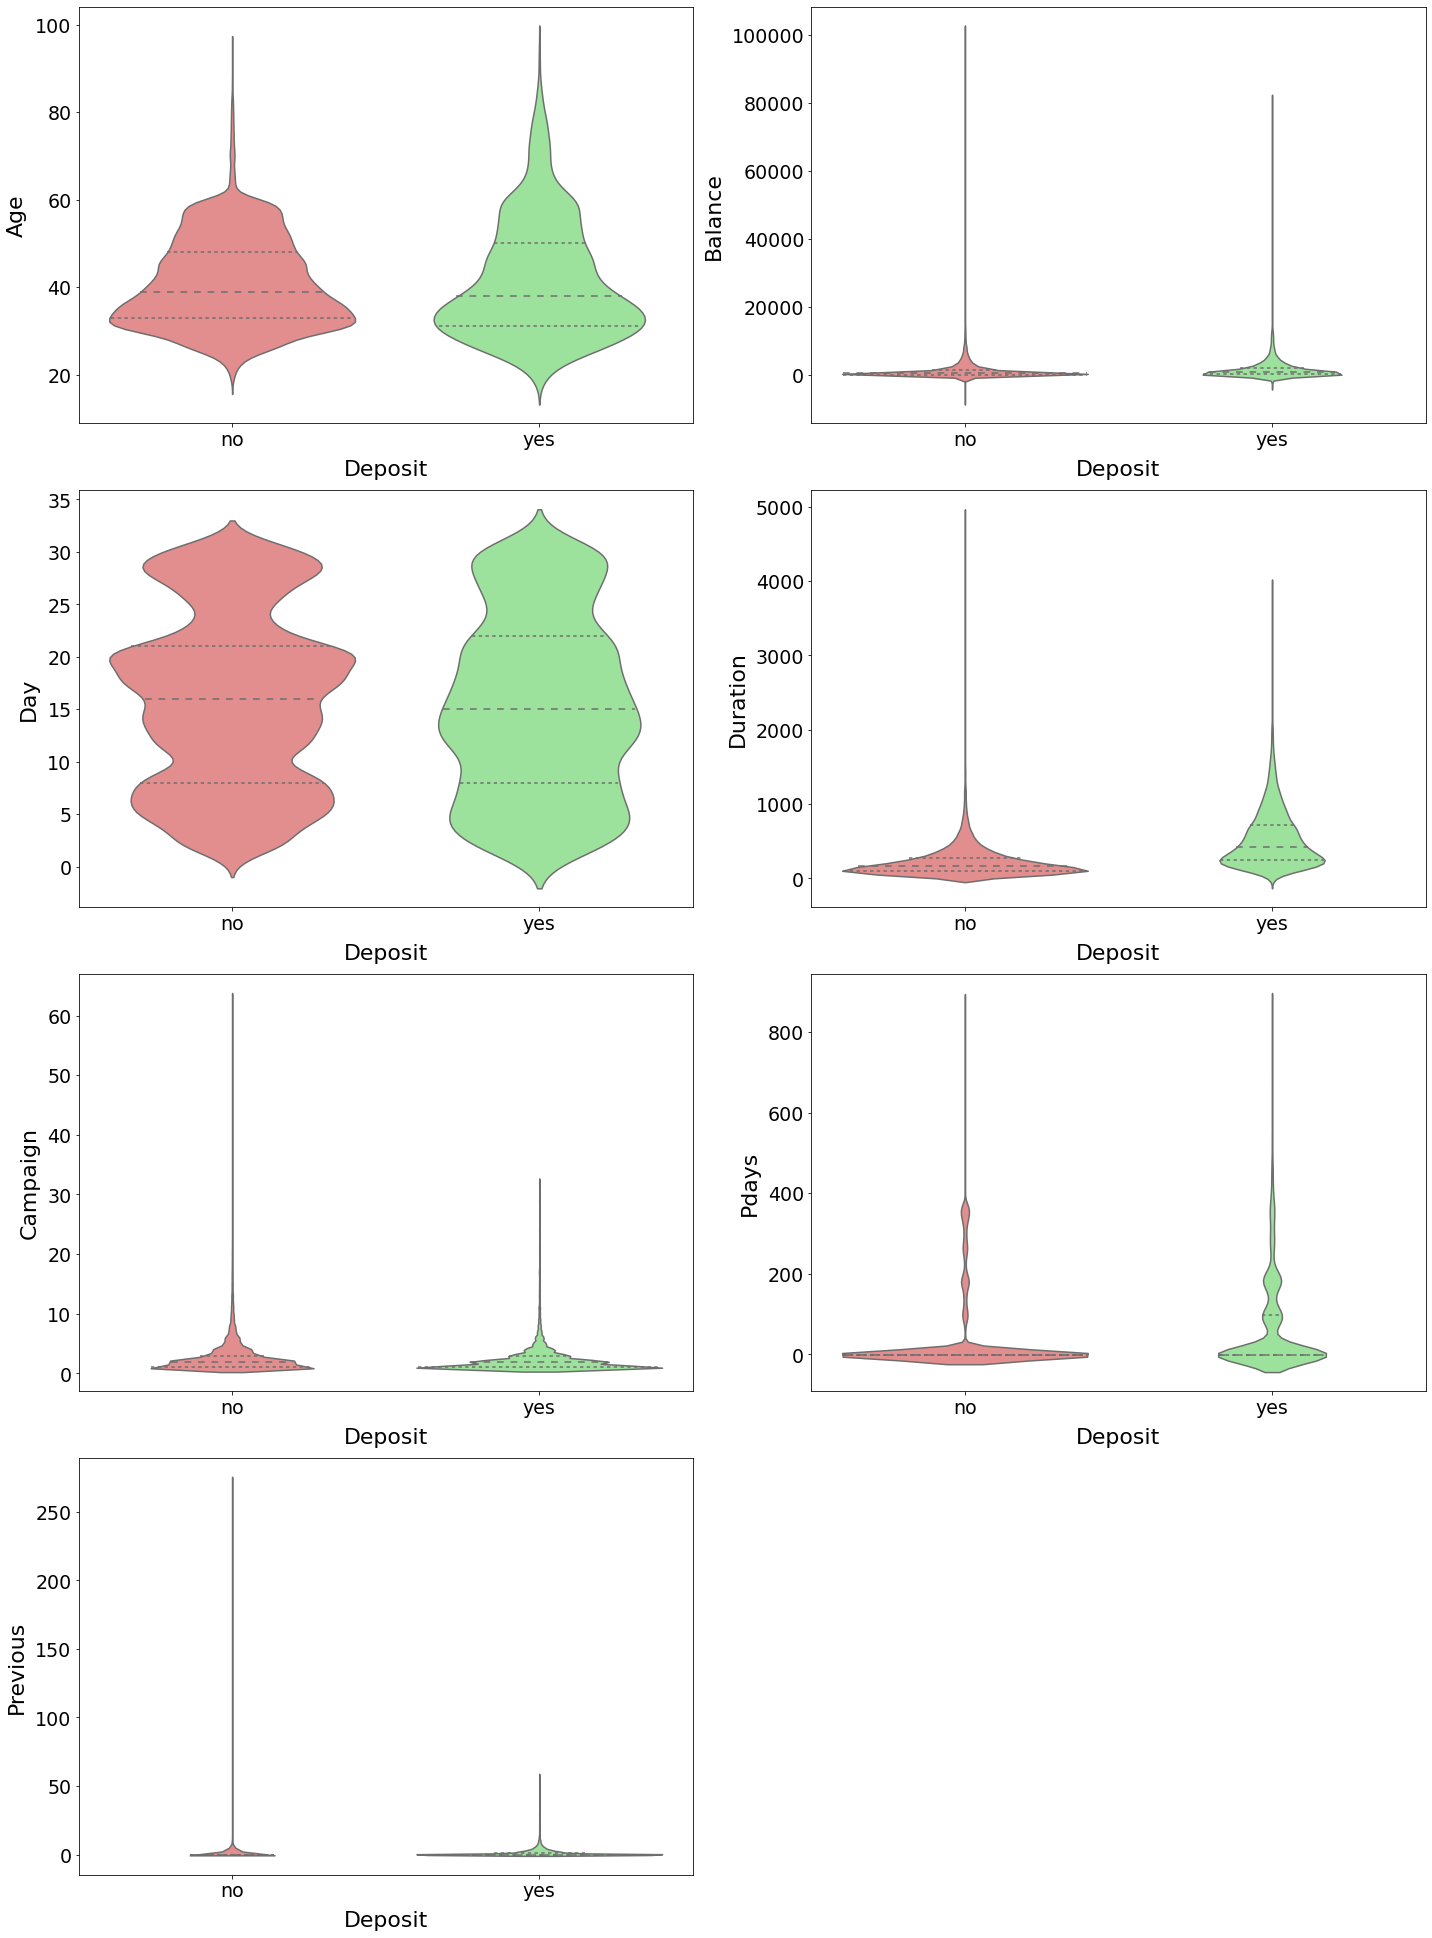

In [ ]:
sns.set_palette(sns.color_palette(['lightcoral', 'lightgreen']))
plt.figure(figsize=(20,80), facecolor='white')
plotnumber = 1
for n_feat in numerical_features:
    ax = plt.subplot(12, 2, plotnumber)
    sns.violinplot(x='y', y= df[n_feat], data=df, inner='quartile')
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)
    plt.xlabel('Deposit', fontsize=22, labelpad=10)
    plt.ylabel(n_feat.capitalize(), fontsize=22, labelpad=8)
    plt.tight_layout()
    plotnumber += 1
plt.show()

Finally, we inspect the distribution of the target variable

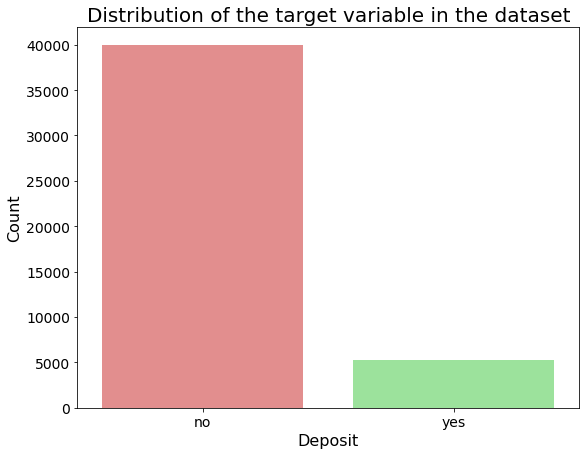

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Distribution of the target variable in the dataset', fontsize=20)
sns.countplot(x=df['y'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Deposit", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

In [ ]:
df_vc = df['y'].value_counts()
print(f'People who subscribed a long term deposit are {round(df_vc["yes"] / df_vc["no"], 2) * 100} %')

People who subscribed a long term deposit are 13.0 %


We can see that dataset is highly **unbalanced**; people who did not subscribe the long term deposit are much more than people who did. In particular, on average, only 13 persons over 100 subscribed it. However, this is something we could expect since it is a bank telemarketing campaing. The true target is a small subset of the potential market, who are the people that have been called. This unbalanced information is extremely important in choosing a model evaluation's metric as we will see in the next sections.

# **Data preprocessing**

### **Map target variable to integer**

First, we have to map the target variable from *no/yes* strings to binary integer values 0/1.

In [ ]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

### **Split in training and test sets**
Split the dataframe into a training set and a test set which is obtained using 20% of original data. We set a random seed in order to fix the randomness, having the possibility to compare results and to get a reproducible result. Finally, we set the *stratify* parameter according to the target variable, in order to have the same ratio of classes in both the training and test set.

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Missing values inspection

In [ ]:
X_train.isna().sum().sum()  # NaN are provided as either "unknown" or specific values per feature

Missing values are not provided explicitly as NaN values, but they are represented with the string unknown. For this reason, we converted it to NaN and then we processed it.

### **Training set duplicates inspection**

We analyzed the duplicates in the training set since a record present more than one time, in this problem, would cause our model to think that such record has a bigger relevance. However we can clearly see that a duplicated record in a bank telemarketing dataset is only due to a mistake in data collection, hence we should remove it to build a model that will be able to model the data in a more general way.

In [ ]:
print(f'There are {len(X_train) - len(X_train.drop_duplicates())} duplicates records 

After the analsyis we can see that there are no duplicates to handle in the training set.

### **Outliers**

We perform an analysis on outliers since they are data points which are likely to be resulting from a measurement error and they could be misleading for the classification model we will build. We can perform outliers detection in different ways, the ones we implemented are:


*   **Z-scores:** Removing data points which z-score is either too low or too high. In particular, the z-score of a data point is computed by taking the raw data point, subtracting the mean of the data and, finally, dividing by the standard deviation of the data. We set z=[-5,5] as valid range of z-score. We compute the z-score on each numerical feature per data point, and if one of them exceed the range then we consider the whole data point as outlier.
*   **Percentiles:** Removing data points which don't lay between a range of two percentiles. In our default setting we considered non-outliers the data point which laid between the 0.5-percentile and 99.5-percentile. We computed the percentiles for every feature and we labeled a data point as outlier if one of its features' values did not fit into the feature's percentiles range.

In [ ]:
def z_score_out_rem(X, th=5):
    '''
    Compute the Z_score of input data and remove outliers according to these scores.
    Parameters
    ----------
    X : dataframe with numeric features only
        Data points on which remove outliers
    th : float
         Threshold float value for z_score

    Returns
    -------
    indices : 1d-array
              Array of indices of outlier data points
    '''

    X_z_scores = stats.zscore(X)
    outliers_indices = [index for index, row in X_z_scores.iterrows() if np.any(row > th) or np.any(row < -th)]
    outliers_indices = np.array(outliers_indices)

    return outliers_indices


def perc_out_rem(X, lp=0.5, up=99.5):
    '''
    Remove outliers according to percentiles.
    Parameters
    ----------
    X : dataframe with numeric features only
        Data points on which remove outliers
    lp : float
         Lower percentile
    up : float
         Upper percentile

    Returns
    -------
    indices : 1d-array
              Array of indices of outlier data points
    '''
    # percentiles per feature
    percentiles = [(np.percentile(X[feature], lp)  , np.percentile(X[feature], up) ) for feature in X.columns]
    outliers_indices = []
    for index, row in X.iterrows():
      for i, feat_val in enumerate(row):
        if feat_val < percentiles[i][0] or feat_val > percentiles[i][1]:
            outliers_indices.append(index)
    outliers_indices = np.array(outliers_indices)

    return outliers_indices


In [ ]:
# Choose the outliers method
outliers_indices = z_score_out_rem(X_train[numerical_features])
# outliers_indices = perc_out_rem(X_train[numerical_features])

valid_indices = [i for i in X_train.index if i not in outliers_indices]
X_train_no_outliers, y_train_no_outliers = X_train.loc[valid_indices, :], y_train[valid_indices]
print(f'Outliers removed: {len(outliers_indices)} which is the {round(len(outliers_indices) / len(X_train) * 100 , 2)} % of the training set')
print(f'Original ratio of positive class: {round(y_train.value_counts()[1] / y_train.value_counts()[0], 2)}')
print(f'Ratio of positive class removed: {round(y_train[outliers_indices].value_counts()[1] / y_train[outliers_indices].value_counts()[0], 2)}')

Outliers removed: 856 which is the 2.37 % of the training set
Original ratio of positive class: 0.13
Ratio of positive class removed: 0.27


We can see that we are removing a lot of positive class, so we have to be careful with our thresholds tuning. Also, if the positive class is often detected as outlier this might be useful information which we would not want to lose.

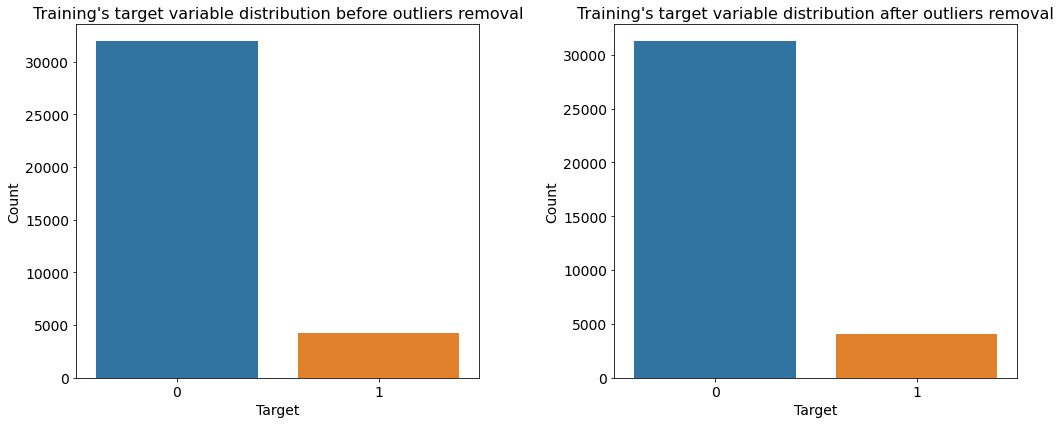

In [ ]:
def set_labels_ticks(axes, id, x_label, y_label):
    '''
    Set labels and ticks values and fontsizes. Work for subplots with 1 row and N columns.

    Parameters
    ----------
    axes : Axes object
           Axes which labels and ticks will be modified
    id : int
         Integer which identify the specific subplot to be modified
    x_label : String
              Label of x-axis
    y_label : String
              Label of y-axis

    Returns
    -------
    axes : Axes object
           Axes with modified labels and ticks
    '''

    axes[id].set_xlabel(x_label, fontsize=14)
    axes[id].set_ylabel(y_label, fontsize=14)
    axes[id].xaxis.set_tick_params(labelsize=14)
    axes[id].yaxis.set_tick_params(labelsize=14)

    return axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].set_title('Training\'s target variable distribution before outliers removal', fontsize=16)
sns.countplot(x=y_train, ax=axes[0])
axes = set_labels_ticks(axes, id=0, x_label='Target', y_label='Count')
axes[1].set_title('Training\'s target variable distribution after outliers removal', fontsize=16)
sns.countplot(x=y_train_no_outliers, ax=axes[1])
axes = set_labels_ticks(axes, id=1, x_label='Target', y_label='Count')
fig.tight_layout()
plt.show()

### **Handling missing values**

After this conversion we can see that the percentages of missing values (in terms of cells, *i.e.* single feature values) in the training set is 7.2 % , corresponding to 41691 values. Also, the number of records with missing values in the training set is the 83 % of the total training set; this is an amount we can **not** ignore and we have to **deal** with. There are several techniques to do so:


*   **Drop records:** remove all the data points which contain at least one missing value. This is a cheap and fast way to handle missing values, however we discarded this option since we would cut the 83 % of the training set, which is not acceptable and would lead to a suboptimal solution.
*   **Forward fill:** It consists in replacing missing values with previous value. At a first sight we may be thinking that this solution suits our dataset since it is a collection of data ordered by date. However, calls to clients are independent one another so we would likely introduce wrong information.
*   **Backward fill:** It consists in replacing missing values with next value. For the same reasons above we discarded this option, even though it is a fast algorithm.
*   **Replacing with mean/mode/median:** This is a better solution since we would introduce information which won't be very far from real value, in the majority of the cases. However, using the mean is a more robust solution since mode and median are more sensitive to specific cases.
*   **Replacing with random values:** This is a very fast solution, but first of all we should put some bounds to the random values range and we are very likely to introduce very wrong information.
*   **KNN imputation:** We can impute missing values by using a K-Nearest Neighbors algorithm; finding the closest record through available information and then exploit it to impute missing values. This is an heavy algorithm, but it is the one that should theoretically work better.

In our analysis we developed KNN imputation and replacement with mean/mode/median.






### **Correlation**
We can now look at how the numerical features are correlated. Correlation is a statistical measure that let us grasps how much two features are related to each other through a linear relation. 
In order to do so, we can plot the correlation heatmap of the features.

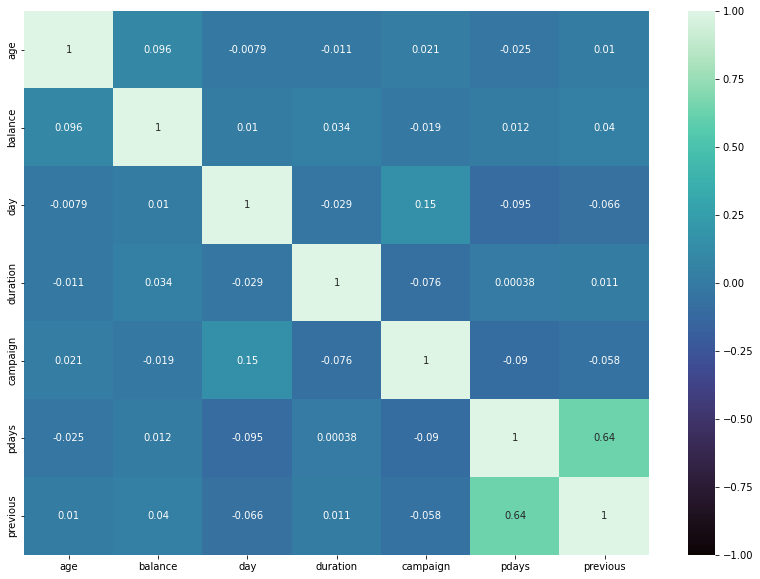

In [ ]:
def plot_corr_mat(X):
    '''
    Plot correlation matrix of X.
    Parameters
    ----------
    X : Dataframe with numeric features only
        Data points on which to compute correlation matrix
    '''
    plt.figure(figsize=(14, 10))
    sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap="mako")
    plt.show()


plot_corr_mat(X_train_no_outliers[numerical_features])

We can see that the highest correlation in absolute value among two different features (*pdays* and *previous*) is 0.64, which is not high enough to drop one of these features.

Another way to see that in this case there is no particular correlation between pairs of features it's the correlogram:

<Figure size 720x576 with 0 Axes>

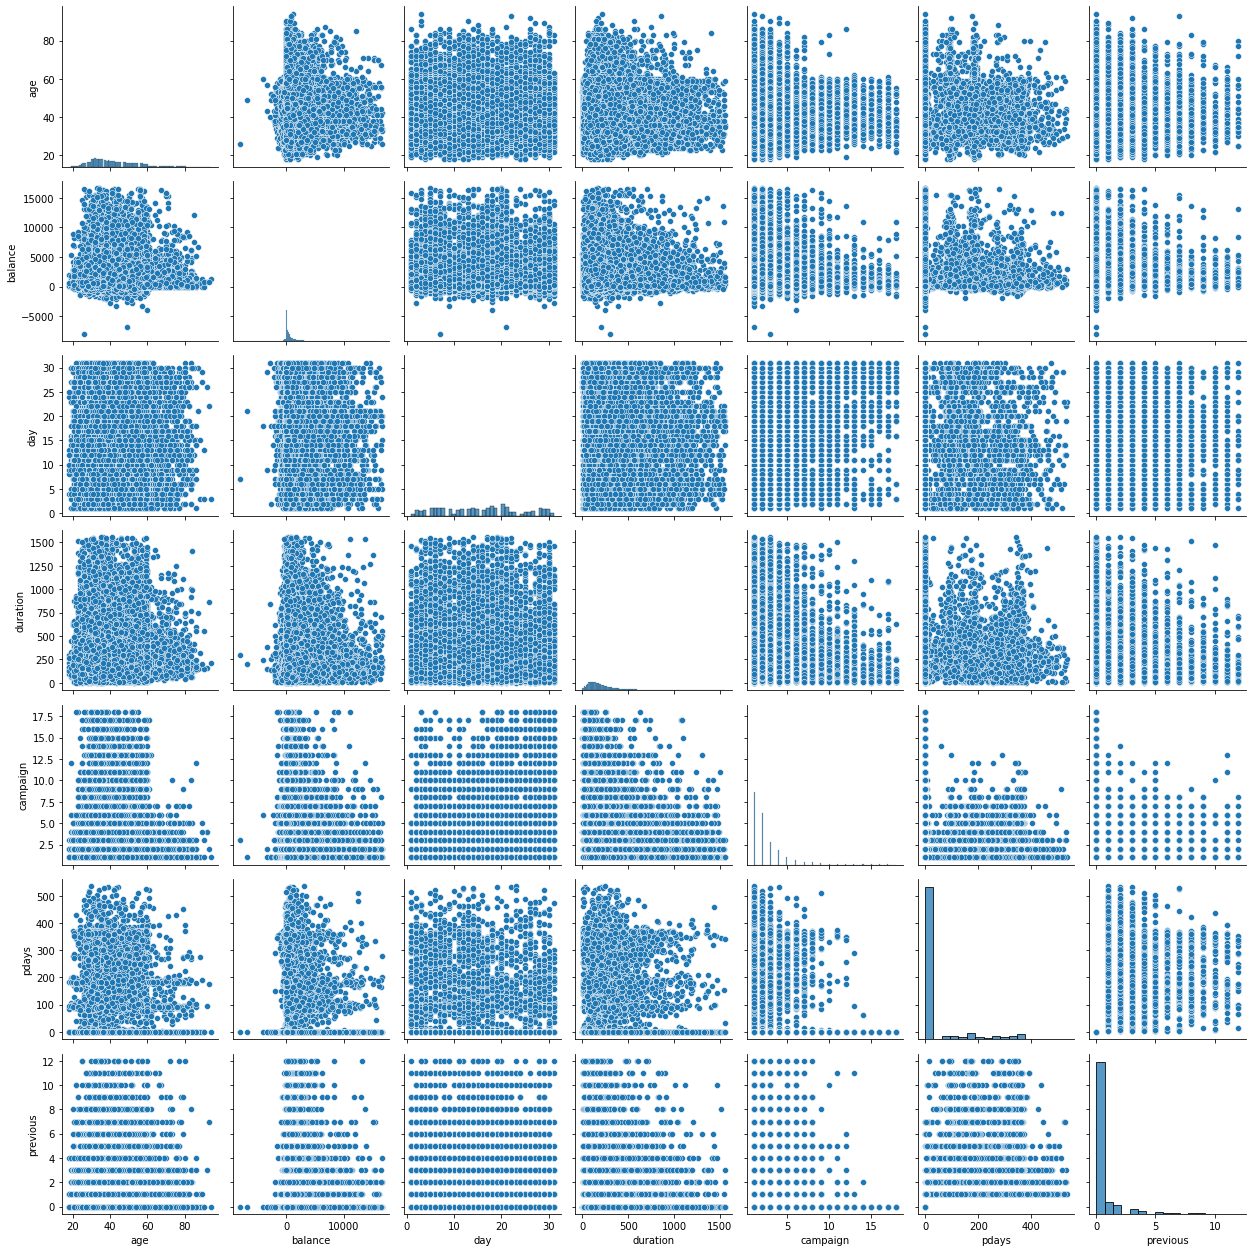

In [ ]:
def plot_correlogram(X):
    '''
    Plot correlogram of X which gives the distribution based on each pair of variables.
    Parameters
    ----------
    X : Dataframe with numeric features only
        Data points on which to compute correlation matrix
    '''
    plt.figure(figsize=(10, 8))
    sns.pairplot(X)
    plt.tight_layout()
    plt.show()


# set back default matplotlib colors
default_colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=default_colors)

plot_correlogram(X_train_no_outliers[numerical_features])

### **Scaling**

We apply scaling on the numerical features since we want all the features to be in the same range and magnitude. Also, in next steps we will apply PCA which is an algorithm that is skewed towards high magnitude features, so we mitigate the problem by means of scaling. There are several techniques to do so, such as:


*   **Standard Scaler:** This standardization consists in replacing each feature's value with its Z-score, hence subtracting the feature's mean and then dividing by the feature's standard deviation.
*   **Min-Max Scaler:** It consists in subtracting the featuer's minimum value and then dividing by the difference between the feature's maximum value and minimum value. The final value will be in the range [0,1]



In [ ]:
def get_scaled_features(X, method='standard'):
    '''
    Scale numerical features according to scaler method.
    Parameters
    ----------
    X : dataframe with numeric features only
        Data points to be scaled
    method : String, either standard or min_max, default is standard
             String defining the method to be used in standardization

    Returns
    -------
    X_scaled : dataframe
                Scaled data points
    scaler : scaler
             Scaler to be used at test time
    '''

    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'min_max':
        scaler = MinMaxScaler()
    else:
        print(f'Error: {method} is not recognized as a valid standardization method, no scaling is applied.')
        return X
  
    X_scaled_array = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(data=X_scaled_array,
                            index=X.index,
                            columns=X.columns)
  
    return X_scaled, scaler

In [ ]:
X_train_scaled = X_train_no_outliers
X_train_scaled[numerical_features], scaler = get_scaled_features(X_train_no_outliers[numerical_features], method='standard')
X_train_scaled.head()

age          job   marital  education default   balance housing  \
24001 -0.458803   technician  divorced  secondary      no -0.165148      no   
43409 -1.589845      student    single  secondary      no  1.397869      no   
18810  0.672239   unemployed   married  secondary      no -0.577325      no   
23130 -0.270296   technician   married  secondary      no -0.454294      no   
15058  0.672239  blue-collar   married  secondary      no  0.146977      no   

      loan    contact       day month  duration  campaign     pdays  previous  \
24001   no  telephone  1.592003   aug -0.488305 -0.253439 -0.412708 -0.351350   
43409   no   cellular -1.295637   apr  2.840495  0.602762  1.519044  4.602342   
18810   no  telephone  1.832640   jul -0.944008  3.599469 -0.412708 -0.351350   
23130   no   cellular  1.231048   aug -0.848528  3.171368 -0.412708 -0.351350   
15058  yes   cellular  0.148183   jul  3.986263 -0.681540 -0.412708 -0.351350   

      poutcome  
24001  unknown  
43409  failure  
18810  unknown  
23130  unknown  
15058  unknown

### **Encoding**

Since we have also categorical features, we need to **encode** them in order to apply some classification models. In literature, there are very many ways to encode categorical features, such as:


*   **Ordinal Encoding:** encoding technique that assigns to each categorical variable a unique label based on alphabetical ordering. This is the most naive encoding of categorical features and it is not very effective since it introduces an order based on the alphabet and this is something that is often wrong. For example if we have two strings, *Italy* and *USA* we would get an encoding of 0 and 1 respectively, which would introduce a non-existing relation of *USA is bigger than Italy*.
*   **One Hot Encoding:** encoding technique that overcomes the problem we analyzed in label encoding by creating additional features based on the number of unique values in the categorical feature. Each of this feature's values are binary values and so 0 and 1; this is where the name *one* hot encoding came from. When using one hot encoding we have to pay attention to the problem called *curse of dimensionality*; this encoding may introduce a very high number of features, making our dataset sparse.
*   **Count Encoding:** encoding technique that encodes each categorical feature's values with its frequency along the dataset. An encoding order is introduced as for the ordinal encoding, however here the order is carrying true information since it is the outcome of a count operation, encoding the frequency of a feature's value.
*   **Target Encoding:** encoding technique that encodes each categorical feature's values with a measurement of the effect they may have on the target variable. For a binary classifier, from a mathematical point of view, it consists in calculating the conditional probability of the target to be either 0/1 given the specific categorical feature's value. We can compute different metric on the target, however the most widely used is the mean and that's why this technique is often called *mean encoding*. However, this encoding has the problem of *overfitting* and *target leakage*.

For this problem, we decided to use **one hot encoding** since we want to avoid target leakage and introducing misleading information. We did not choose count encoding since the amount of features introduced by the one hot encoding is not very high in this case and so we decided to exploit a bigger number of features through one hot encoding.



In [ ]:
def ordinal_encoding(X):
    '''
    Encode categorical features with ordinal encoding.
    Parameters
    ----------
    X : dataframe
        Data points with categorical attributes to be encoded
    y : series
        Target variable for each data point

    Returns
    -------
    X_encoded : dataframe
                Data points with encoded categorical attributes
    enc : Encoder
          Encoder to be used at test time
    '''

    enc = category_encoders.ordinal.OrdinalEncoder()
    X_encoded = enc.fit_transform(X)

    return X_encoded, enc


def one_hot_encoding(X):
    '''
    Encode categorical features with one hot encoding.
    Parameters
    ----------
    X : dataframe
        Data points with categorical attributes to be encoded
    y : series
        Target variable for each data point

    Returns
    -------
    X_encoded : dataframe
                Data points with encoded categorical attributes
    enc : Encoder
          Encoder to be used at test time
    '''

    enc = category_encoders.one_hot.OneHotEncoder(use_cat_names=True)
    X_encoded = enc.fit_transform(X)

    return X_encoded, enc


def count_encoding(X, y):
    '''
    Encode categorical features with count encoding.
    Parameters
    ----------
    X : dataframe
        Data points with categorical attributes to be encoded
    y : series
        Target variable for each data point

    Returns
    -------
    X_encoded : dataframe
                Data points with encoded categorical attributes
    enc : Encoder
          Encoder to be used at test time
    '''

    enc = category_encoders.count.CountEncoder()
    X_encoded = enc.fit_transform(X, y)

    return X_encoded, enc


def target_encoding(X, y):
    '''
    Encode categorical features with target encoding.
    Parameters
    ----------
    X : dataframe
        Data points with categorical attributes to be encoded
    y : series
        Target variable for each data point

    Returns
    -------
    X_encoded : dataframe
                Data points with encoded categorical attributes
    enc : Encoder
          Encoder to be used at test time
    '''
  
    enc = category_encoders.target_encoder.TargetEncoder()
    X_encoded = enc.fit_transform(X, y)

    return X_encoded, enc

In [ ]:
X_train_scaled_encoded, encoder = one_hot_encoding(X_train_scaled)
X_train_scaled_encoded.head()

age  job_technician  job_student  job_unemployed  job_blue-collar  \
24001 -0.458803               1            0               0                0   
43409 -1.589845               0            1               0                0   
18810  0.672239               0            0               1                0   
23130 -0.270296               1            0               0                0   
15058  0.672239               0            0               0                1   

       job_management  job_services  job_admin.  job_retired  job_unknown  \
24001               0             0           0            0            0   
43409               0             0           0            0            0   
18810               0             0           0            0            0   
23130               0             0           0            0            0   
15058               0             0           0            0            0   

       ...  month_sep  month_dec  duration  campaign     pdays  previous  \
24001  ...          0          0 -0.488305 -0.253439 -0.412708 -0.351350   
43409  ...          0          0  2.840495  0.602762  1.519044  4.602342   
18810  ...          0          0 -0.944008  3.599469 -0.412708 -0.351350   
23130  ...          0          0 -0.848528  3.171368 -0.412708 -0.351350   
15058  ...          0          0  3.986263 -0.681540 -0.412708 -0.351350   

       poutcome_unknown  poutcome_failure  poutcome_other  poutcome_success  
24001                 1                 0               0                 0  
43409                 0                 1               0                 0  
18810                 1                 0               0                 0  
23130                 1                 0               0                 0  
15058                 1                 0               0                 0  

[5 rows x 51 columns]

### **PCA**

Now we apply Principal Component Analysis and we look at the components...


In [ ]:
def apply_pca(X, n_comp):
    '''
    Apply PCA on the input data points.
    Parameters
    ----------
    X : dataframe
        Data points on which applying PCA
    n_comp : float
             Can be number of components if int, or explained variance to keep through PCA if float

    Returns
    -------
    X_pca : ndarray
            Array of data points after PCA is applied
    pca : PCA object
          Return pca to be used for test and since it can be used for plots
    '''

    pca = PCA(n_comp)
    X_pca = pca.fit_transform(X)

    return X_pca, pca

In [ ]:
X_train_pca, pca = apply_pca(X_train_scaled_encoded, n_comp=X_train_scaled_encoded.shape[1])

We can now look at components to see if we can drop some features.

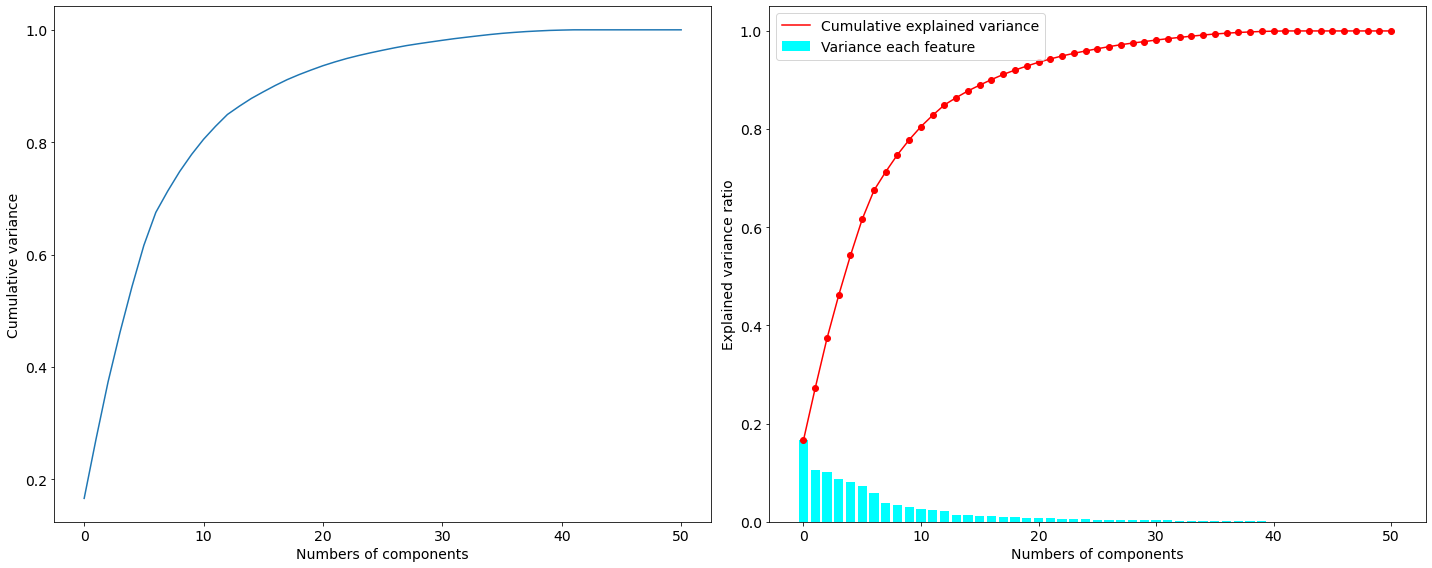

In [ ]:
def plot_cum_variance(pca):
    '''   
    Plot cumulative variance and number of components and plot same chart with additional information on component's variance.
    Parameters
    ----------
    pca : PCA object
          Object to be used for the plot, must be fit on data points
    '''

    exp_var_ratio = pca.explained_variance_ratio_
    cumulative = np.cumsum(exp_var_ratio)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(cumulative)
    axes = set_labels_ticks(axes, id=0, x_label='Numbers of components', y_label='Cumulative variance')


    plt.bar(range(len(exp_var_ratio)), exp_var_ratio, color='cyan', align = 'center', label = 'Variance each feature')
    axes[1].plot(cumulative,'o', color = 'red')
    axes[1].plot(cumulative, color = 'red', label = 'Cumulative explained variance')
    axes = set_labels_ticks(axes, id=1, x_label='Numbers of components', y_label='Explained variance ratio')
    axes[1].legend(loc='best', fontsize=14)

    fig.tight_layout()
    plt.show()
    

plot_cum_variance(pca=pca)

We can see that the number of components which are explaining a big part of the total variance are not all the components; hence we can drop some of them. In order to do that we could either specify a number of components we want to keep, or to specify the explained amount of variance we want. We chose the latter method with 95% of variance that corresponds to roughly half of the original components:

In [ ]:
X_train_pca, pca = apply_pca(X_train_scaled_encoded, n_comp=0.95)
print(f'The number of components is {X_train_pca.shape[1]}')

The number of components is 24


## **Balancing the dataset**

As we noticed the value of the distribution for the output label if the client will subscribe or not the term deposit, the distribution is strongly unbalanced, towards a *no*.
The impact of the unbalanceness of the output labels could be reduced by using some oversampling techniques.
We are going to see and compare two different techniques, which both are going to increase the number of features by creating artificial instances for the class with the lowest number.
We are going to compare: 


*   oversampling : random oversampling the under represented class
*   SMOTE





In [ ]:
class RandomSamp():
  def __init__(self, ):
    pass

  def fit(self, X_train, y_train):
    # using random oversampling
    random_state=42 # to use this random state for all the parts which generate randomness
    ROS = RandomOverSampler(random_state=random_state)
    X_train_oversampled, y_train_oversampled = ROS.fit_resample(X_train, y_train)
    return X_train_oversampled, y_train_oversampled



In [ ]:
randomOverSampler = RandomSamp()
X_train_random_oversampled, y_train_random_oversampled = randomOverSampler.fit(X_train, y_train)

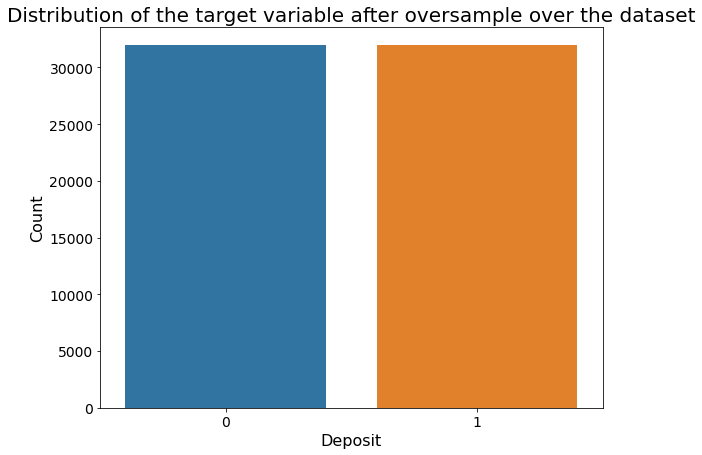

In [ ]:
# Plot of distribution after the target variable has changed
plt.figure(figsize=(9,7))
plt.title('Distribution of the target variable after oversample over the dataset', fontsize=20)
sns.countplot(x=y_train_random_oversampled)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Deposit", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

## **Feature selection**


We are going to apply Backward Elimination


In [ ]:
class backwardElimination():

  def __init__(self, significance=0.1):
    self.significance = significance

  def fit(self, X, y):
    # Return the columns which are kept from the backward elimination
    X_copy = X.copy()
    # print(X_copy.info())
    still_back = True # I contintue to fit the model and look at the values till they are lower than the significance level

    while still_back:
      model_fitted = sm.Logit(y, X_copy).fit()
      pvalues = model_fitted.pvalues

      pvalue_max = np.max(pvalues)
      if pvalue_max > self.significance:
        index_column = model_fitted.pvalues.index[np.argmax(pvalues)]
        X_copy = X_copy.drop(columns=index_column, axis=1)
        print("Removed " + index_column + " with p-value: " + str(pvalue_max))
        # print(model_fitted.pvalues)
      else:
        still_back=False

    return X_copy.columns

In [ ]:
X_train_scaled_encoded = sm.add_constant(X_train_scaled_encoded) # To add a constant or not to add?
y_train_no_outliers = y_train_no_outliers.astype('float32')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train_scaled_encoded[["age","balance","day","duration","campaign","pdays","previous"]] = X_train_scaled_encoded[["age","balance","day","duration","campaign","pdays","previous"]].astype("float32")

In [ ]:
back = backwardElimination(significance=0.025)
columns_backed_scaled = back.fit(X_train_scaled_encoded, y_train_no_outliers) 

Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 8
Removed month_apr with p-value: 0.9999999308914304
Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 9
Removed job_management with p-value: 0.9999999891856767
Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 8
Removed loan_no with p-value: 0.9999999546202971
Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 8
Removed education_tertiary with p-value: 0.9999999280627133
Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 8
Removed housing_no with p-value: 0.9999999799896138
Optimization terminated successfully.
         Current function value: 0.229232
         Iterations 8
Removed job_services with p-value: 0.7170981732920019
Optimization terminated successfully.
         Current function va

In [ ]:
X_train_scaled_encoded.columns

Index(['const', 'age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6',
       'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'default_1', 'default_2', 'balance', 'housing_1',
       'housing_2', 'loan_1', 'loan_2', 'contact_1', 'contact_2', 'contact_3',
       'day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'poutcome_4'],
      dtype='object')

In [ ]:
X_train_backward = X_train_scaled_encoded[columns_backed_scaled]

# **Classification**

First, preprocess the test set

In [ ]:
def preprocessing_test_set(X, numerical_features, scaler, encoder, pca):
    '''
    Apply all preprocessing pipeline at once.
    Parameters
    ----------
    X : dataframe
        Data points on which applying preprocessing
    numerical_features : list
                         List of names of numerical features of the data points
    scaler : scaler
             Fit scaler to be used to transform data
    encoder : encoder
              Fit encoder to be used to transform data
    pca : pca
          Fit pca to be used to transform data

    Returns
    -------
    X_preprocessed : ndarray
                     Array of data points after preprocessing is applied
    '''
    X_scaled = X.copy()
    X_num_scaled_array = scaler.transform(X[numerical_features])
    X_num_scaled = pd.DataFrame(data=X_num_scaled_array,
                                index=X[numerical_features].index,
                                columns=X[numerical_features].columns)
    X_scaled[numerical_features] = X_num_scaled
    X_scaled_encoded = encoder.transform(X_scaled)
    X_preprocessed = pca.transform(X_scaled_encoded)

    return X_preprocessed, X_scaled_encoded

X_train_preprocessed, y_train = X_train_pca, y_train_no_outliers
X_test_preprocessed, X_test_preprocessed_no_pca = preprocessing_test_set(X_test, numerical_features, scaler, encoder, pca)

# Defining all the different dataset to which apply the gridsearch

In [ ]:
X_train_pca, pca = apply_pca(X_train_scaled_encoded, n_comp=24)
X_train_no_pca = X_train_scaled_encoded 

In [ ]:
from sklearn.model_selection import StratifiedKFold

no_pca_data = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
no_pca_data.get_n_splits(X_train_no_pca, y_train)
print(no_pca_data)

pca_data = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pca_data.get_n_splits(X_train_pca, y_train)
print(pca_data)


StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

Define a dictionary to map classifier string names to their respective Classifier object

Then, since we use a grid search approach we define a function for it:

In [ ]:
def fit_grid_search(skf, clf, params, metric, n_jobs=3, cv=5):
    '''
    Apply a grid search with cross-validation on the data points.
    Parameters
    ----------
    X : dataframe
        Data points on which applying preprocessing
    y : series
        Data points' labels
    clf : classifier
          Classifier object to be used for classification
    params : dictionary
             Dictionary of parameters to be used in the grid search
    metric : string
              Scoring metric to be used for selecting best parameters' set
    n_jobs : int
             Number of processors to be used, default is 3
    cv : int
         Number of folds in cross-validation, default is 5

    Returns
    -------
    gs : GridSearchCV object
         GridSearchCV object fit on data points with best set of parameters through cross-validation
    '''

    gs = GridSearchCV(estimator=clf, param_grid=params, n_jobs=n_jobs, cv=skf, scoring=metric, refit=True, verbose=3)
    gs.fit(X, y)

    print(f'The best set of parameters is {gs.best_params_}')

    return gs

Define dictionaries for parameters' grid of each classifier we wish to use


In [ ]:
params_tree = {'classifier__criterion': ['gini', 'entropy'], 
               'classifier__max_features': ['sqrt', 'log2'],
               'classifier__ccp_alpha':[0.005,0.01,0.05,0.1]}


params_rf ={'classifier__n_estimators':[500],
            'classifier__max_features':['sqrt', 'log2'],
            'classifier__bootstrap': [True],
            'classifier__criterion':['gini','entropy']}


params_svm = {'classifier__C': [0.5, 1, 3], 
              'classifier__kernel': ['rbf']}


params_knn = {'classifier__n_neighbors': [2, 5, 10], 
              'classifier__weights': ['uniform', 'distance']}


params_lr = {'classifier__penalty': ['l1', 'l2', 'elastic_net'],
             'classifier__tol': [1e-3, 1e-4, 1e-5],
             'classifier__C': [0.5, 1.0]}

Define a function to evaluate the classifier on the test set

In [ ]:
def evaluate_test_set(X_test, y_test, clf, metric):
    '''
    Evaluate classifier performances on the unseen data.
    Parameters
    ----------
    X : dataframe
        Data points on which applying preprocessing
    y : series
        Data points' labels
    clf : classifier
          Classifier object to be used for classification
    metric : string
             Scoring metric to be used for evaluating classifier's performances

    Returns
    -------
    y_pred : ndarray
             Array of predictions of data points' labels
    '''

    y_pred = clf.predict(X_test)
    if metric == 'accuracy':
        score = accuracy_score(y_test, y_pred)
    elif metric == 'precision':
        score = precision_score(y_test, y_pred)
    elif metric == 'recall':
        score = recall_score(y_test, y_pred)
    elif metric == 'f1':
        score = f1_score(y_test, y_pred)
    elif metric == 'roc_auc':
        score = roc_auc_score(y_test, y_pred)
    else:
        raise Exception('Metric\' string not valid, please select either accuracy, precision, recall, f1 or auc')

    print(f'The {metric} score is {round(score, 2)}')

    return y_pred


In [ ]:
def roc_cm_scores_er(y, y_pred, label):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    # ROC
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    axs[0].plot(fpr, tpr,  label=label)
    axs[0].set_title("ROC curve", fontsize=20)
    axs[0].set_xlabel("False Positive Rate", fontsize=15)
    axs[0].set_ylabel("True Positive Rate", fontsize=15)
    axs[0].xaxis.set_tick_params(labelsize=15)
    axs[0].yaxis.set_tick_params(labelsize=15)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    # If above the optimal threshold it is mapped to 1, otherwise 0
    y_pred = y_pred >= optimal_threshold
    # Confusion matrix - normalize values for readability
    sns.heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap="Oranges", ax=axs[1])
    axs[1].set_title("Confusion matrix", fontsize=20)
    axs[1].set_xlabel("Predicted label", fontsize=15)
    axs[1].set_ylabel("True label", fontsize=15)
    axs[1].xaxis.set_tick_params(labelsize=15)
    axs[1].yaxis.set_tick_params(labelsize=15)
    plt.show()
    print(f"The optimal threshold is at {optimal_threshold:.2f}")
    # Scores
    print(f"Accuracy score: {accuracy_score(y, y_pred):.2f}")
    print(f"Precision score: {precision_score(y, y_pred):.2f}")
    print(f"Recall score: {recall_score(y, y_pred):.2f}")
    print(f"F1 score: {f1_score(y, y_pred):.2f}")
    print(f"AUC score: {roc_auc_score(y, y_pred):.2f}")
    # Error rate (should be equal to 1 - accuracy score)
    print(f"Error rate: {error_rate(y, y_pred):.2f}")

    return y_pred.astype(int)  # map bool to 0/1

In [ ]:
def predict_mh(X, samples):
    return 1 / samples.shape[0] * np.sum(logistic(samples @ X.T), axis=0)  # approximated


def error_rate(y, y_pred):
    return (y != y_pred).sum() / len(y)


# Interpretability with decision tree and backward propagation

In [ ]:
clf = DecisionTreeClassifier()
metric = 'roc_auc'
X_train_backward = X_train_scaled_encoded[columns_backed_scaled]
X_test_backward = X_test_preprocessed_no_pca[columns_backed_scaled]

In [ ]:

data_backed = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
data_backed.get_n_splits(X_train_backward, y_train)
print(data_backed)

pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, params_tree, scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
gs_clf_inter.fit(X_train_backward, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        DecisionTreeClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__ccp_alpha': [0.005, 0.01, 0.05, 0.1],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': ['sqrt', 'log2']},
             scoring='f1', verbose=3)

In [ ]:
gs_clf_inter.best_params_

{'classifier__ccp_alpha': 0.01,
 'classifier__criterion': 'entropy',
 'classifier__max_features': 'sqrt'}

The roc_auc score is 0.76


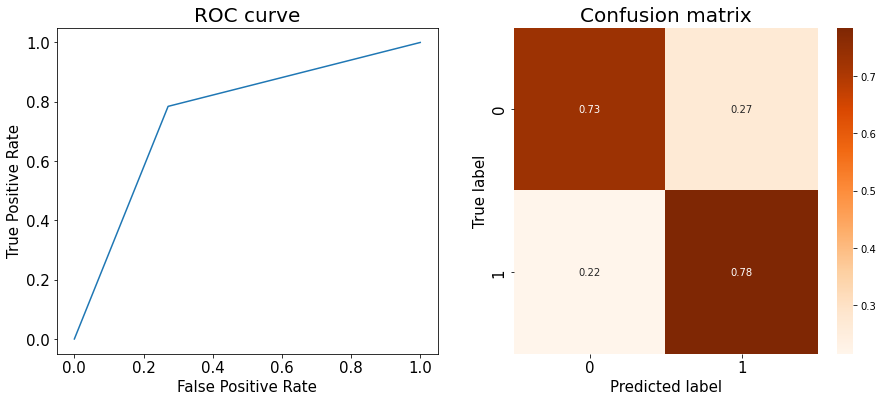

The optimal threshold is at 1.00
Accuracy score: 0.74
Precision score: 0.28
Recall score: 0.78
F1 score: 0.41
AUC score: 0.76
Error rate: 0.26


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Decision Tree Interpretable Model')

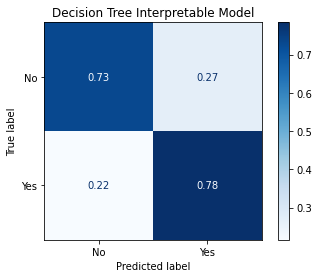

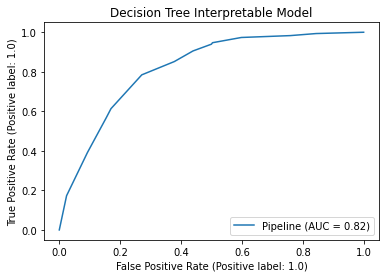

In [ ]:
y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

In [ ]:
dot = export_graphviz(gs_clf_inter.best_estimator_['classifier'], feature_names=X_train_backward.columns) # C'era un modo più carino per mostrare l'albero di decisione
print(dot)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="contact_unknown <= 0.5\ngini = 0.5\nsamples = 62528\nvalue = [31264, 31264]"] ;
1 [label="balance <= -0.561\ngini = 0.49\nsamples = 50255\nvalue = [21489, 28766]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="poutcome_success <= 0.5\ngini = 0.425\nsamples = 6846\nvalue = [4750, 2096]"] ;
1 -> 2 ;
3 [label="duration <= 1.019\ngini = 0.411\nsamples = 6640\nvalue = [4721, 1919]"] ;
2 -> 3 ;
4 [label="gini = 0.212\nsamples = 4960\nvalue = [4361, 599]"] ;
3 -> 4 ;
5 [label="gini = 0.337\nsamples = 1680\nvalue = [360, 1320]"] ;
3 -> 5 ;
6 [label="gini = 0.242\nsamples = 206\nvalue = [29, 177]"] ;
2 -> 6 ;
7 [label="duration <= -0.393\ngini = 0.474\nsamples = 43409\nvalue = [16739, 26670]"] ;
1 -> 7 ;
8 [label="campaign <= -0.254\ngini = 0.354\nsamples = 10855\nvalue = [8359, 2496]"] ;
7 -> 8 ;
9 [label="gini = 0.469\nsamples = 4721\nvalue = [2949, 1772]"] ;
8 -> 9 ;
10

### **Decision Tree Classifier**

Our first model to apply is a **decision tree**.
Decision Trees could both be used for classification and regression tasks, the procedure that a **classification tree** follows is to recursively split with a binary partition the set at each node level into subsets by following splitting rules on the features.
Starting from the root node, the split is applied recursively until a stopping condition is met, this condition could be that all nodes contains elements belonging to the same class, or the maximum height of the tree imposed is reached or no improvements is achieved

In [ ]:
clf = DecisionTreeClassifier()
metric = 'roc_auc'
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_no_pca = GridSearchCV(pipeline_clf, params_tree, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_clf_pca = GridSearchCV(pipeline_clf, params_tree, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)

In [ ]:
gs_clf_no_pca.fit(X_train_no_pca, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['random', RandomOverSampler()],
                                       ['classifier',
                                        DecisionTreeClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__ccp_alpha': [0.005],
                         'classifier__criterion': ['entropy'],
                         'classifier__max_features': ['sqrt']},
             scoring='f1', verbose=3)

In [ ]:
gs_clf_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        DecisionTreeClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__ccp_alpha': [0.005, 0.01, 0.05, 0.1],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': ['sqrt', 'log2']},
             scoring='f1', verbose=3)

In [ ]:
gs_clf_no_pca.best_params_

{'classifier__ccp_alpha': 0.005,
 'classifier__criterion': 'entropy',
 'classifier__max_features': 'sqrt'}

In [ ]:
gs_clf_pca.best_params_

{'classifier__ccp_alpha': 0.005,
 'classifier__criterion': 'entropy',
 'classifier__max_features': 'sqrt'}

In [ ]:
# Serve per mettere apposto i parametri da mandare 
def create_params(best_params):
  params = {}
  for key, value in best_params.items():
    params[key] = [value]
  return params

In [ ]:
create_params(gs_clf_pca.best_params_)

{'classifier__ccp_alpha': [0.005],
 'classifier__criterion': ['entropy'],
 'classifier__max_features': ['sqrt']}

In [ ]:
gs_clf_pca.best_estimator_['classifier']

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy',
                       max_features='sqrt')

In [ ]:
dot = export_graphviz(gs_clf_no_pca.best_estimator_['classifier']) # C'era un modo più carino per mostrare l'albero di decisione
print(dot)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[45] <= -0.319\nentropy = 1.0\nsamples = 62528\nvalue = [31264, 31264]"] ;
1 [label="X[0] <= 1.804\nentropy = 0.987\nsamples = 46665\nvalue = [26443, 20222]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[43] <= 0.684\nentropy = 0.978\nsamples = 44411\nvalue = [26072, 18339]"] ;
1 -> 2 ;
3 [label="X[44] <= -0.253\nentropy = 0.78\nsamples = 29802\nvalue = [22918, 6884]"] ;
2 -> 3 ;
4 [label="X[23] <= 0.5\nentropy = 0.941\nsamples = 12875\nvalue = [8261, 4614]"] ;
3 -> 4 ;
5 [label="X[34] <= 0.5\nentropy = 0.674\nsamples = 6045\nvalue = [4974, 1071]"] ;
4 -> 5 ;
6 [label="X[44] <= -0.681\nentropy = 0.643\nsamples = 5750\nvalue = [4810, 940]"] ;
5 -> 6 ;
7 [label="entropy = 0.526\nsamples = 5459\nvalue = [4810, 649]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 291\nvalue = [0, 291]"] ;
6 -> 8 ;
9 [label="entropy = 0.991\nsamples = 295\nvalue = [164, 131]"] ;
5 

The roc_auc score is 0.71


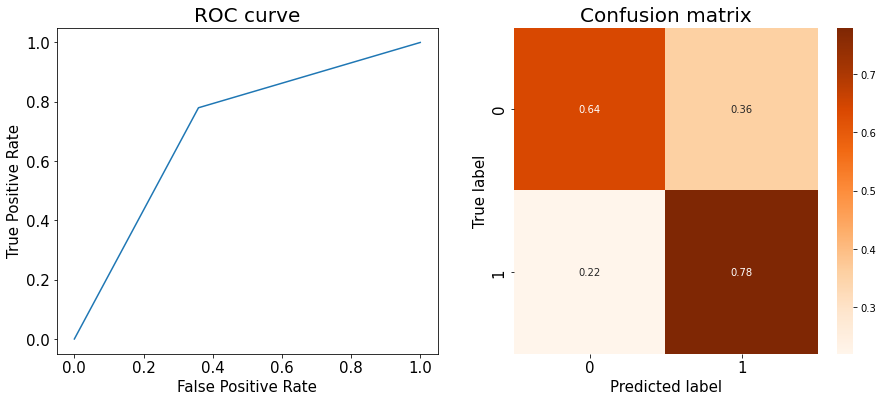

The optimal threshold is at 1.00
Accuracy score: 0.66
Precision score: 0.22
Recall score: 0.78
F1 score: 0.35
AUC score: 0.71
Error rate: 0.34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

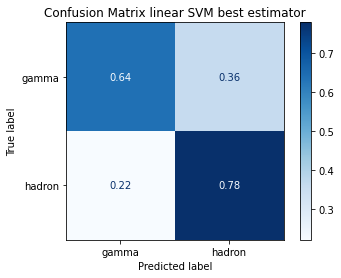

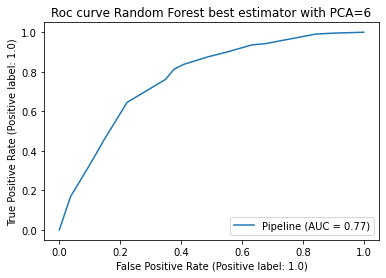

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_clf_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_pca.best_estimator_, X_test_preprocessed, y_test) 

The roc_auc score is 0.76


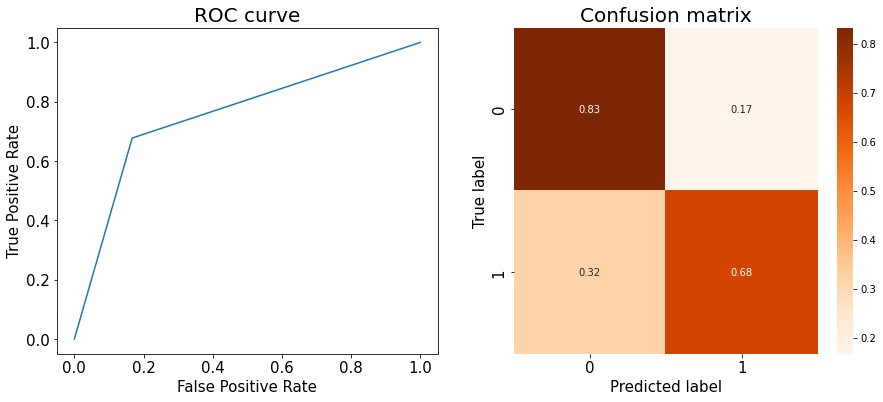

The optimal threshold is at 1.00
Accuracy score: 0.81
Precision score: 0.35
Recall score: 0.68
F1 score: 0.46
AUC score: 0.76
Error rate: 0.19


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

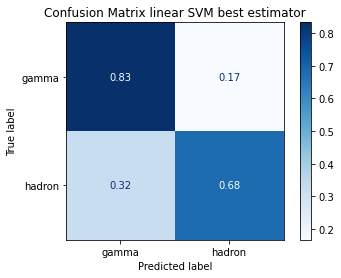

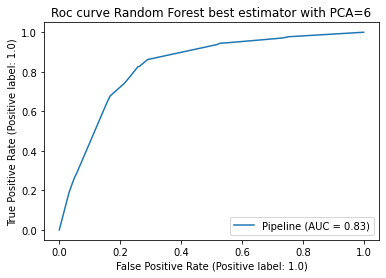

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_clf_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

In [ ]:
gs_clf_no_pca.best_params_

{'classifier__ccp_alpha': 0.005,
 'classifier__criterion': 'entropy',
 'classifier__max_features': 'sqrt'}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.73


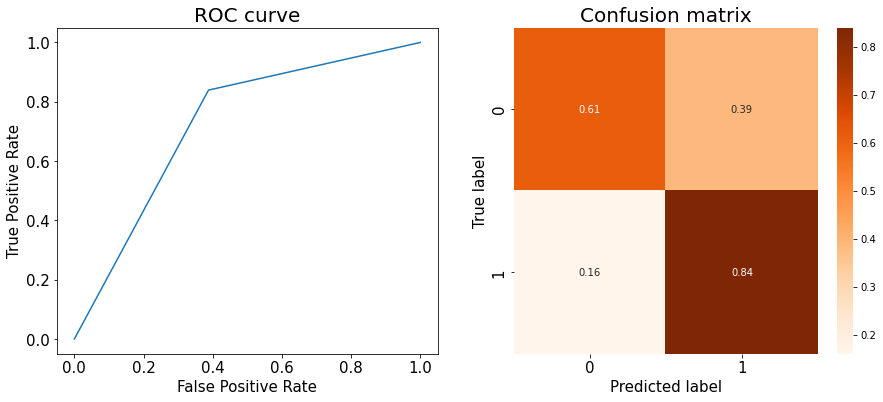

The optimal threshold is at 1.00
Accuracy score: 0.64
Precision score: 0.22
Recall score: 0.84
F1 score: 0.35
AUC score: 0.73
Error rate: 0.36
The roc_auc score is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


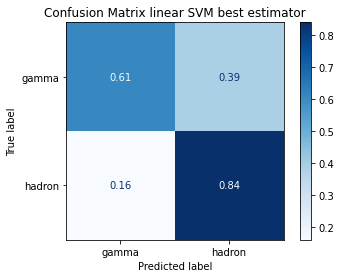

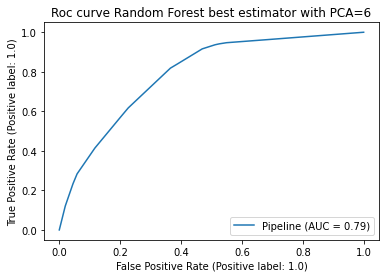

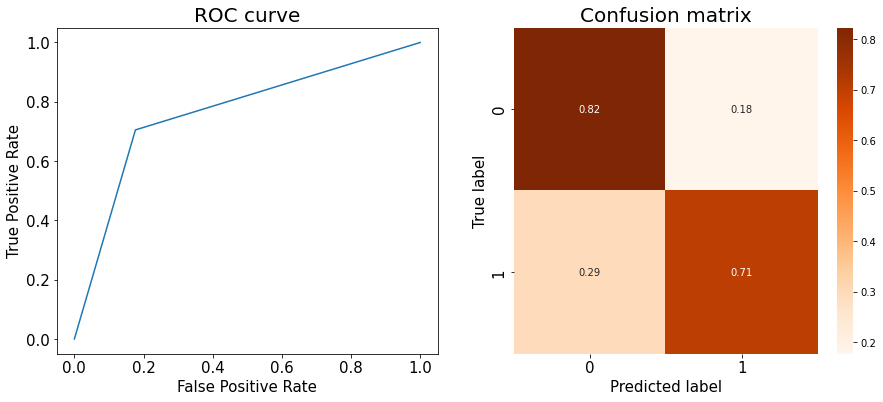

The optimal threshold is at 1.00
Accuracy score: 0.81
Precision score: 0.35
Recall score: 0.71
F1 score: 0.46
AUC score: 0.76
Error rate: 0.19
{'classifier__ccp_alpha': 0.005, 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt'}
{'classifier__ccp_alpha': 0.005, 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


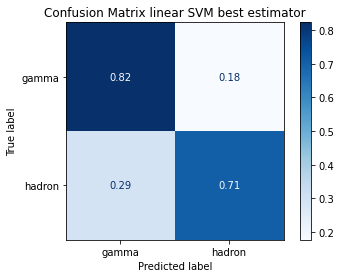

In [ ]:
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_no_pca.best_params_), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_clf_pca = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_pca.best_params_), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_clf_pca.fit(X_train_pca, y_train)
gs_clf_no_pca.fit(X_train_no_pca, y_train)

y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_clf_pca, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_clf_no_pca, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

print(gs_clf_no_pca.best_params_)
print(gs_clf_pca.best_params_)

###BACKWARD 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.74


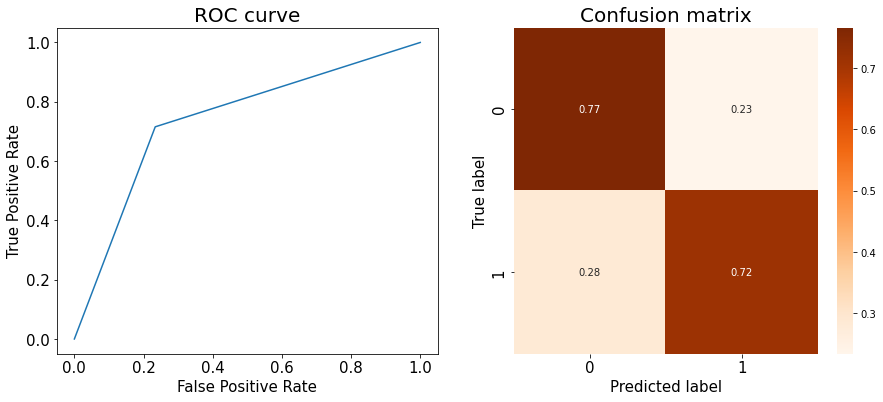

The optimal threshold is at 1.00
Accuracy score: 0.76
Precision score: 0.29
Recall score: 0.72
F1 score: 0.41
AUC score: 0.74
Error rate: 0.24


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

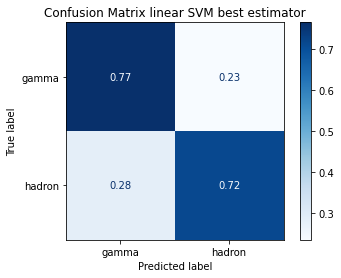

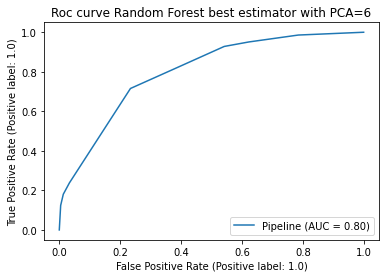

In [ ]:
# BACKWARD
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.5


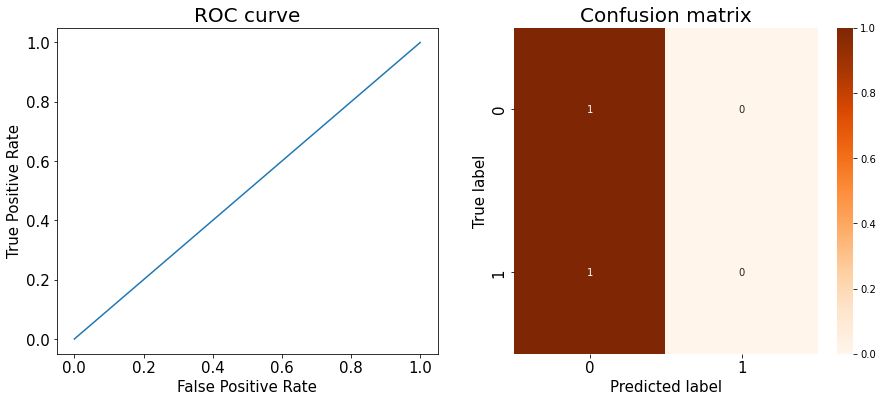

The optimal threshold is at 1.00
Accuracy score: 0.88
Precision score: 0.00
Recall score: 0.00
F1 score: 0.00
AUC score: 0.50
Error rate: 0.12
The roc_auc score is 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from

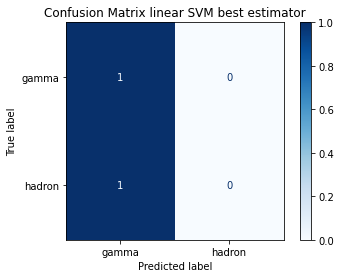

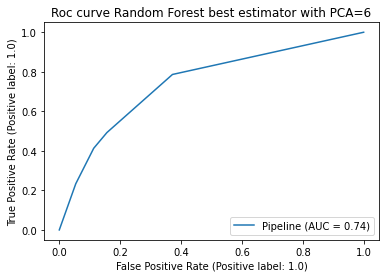

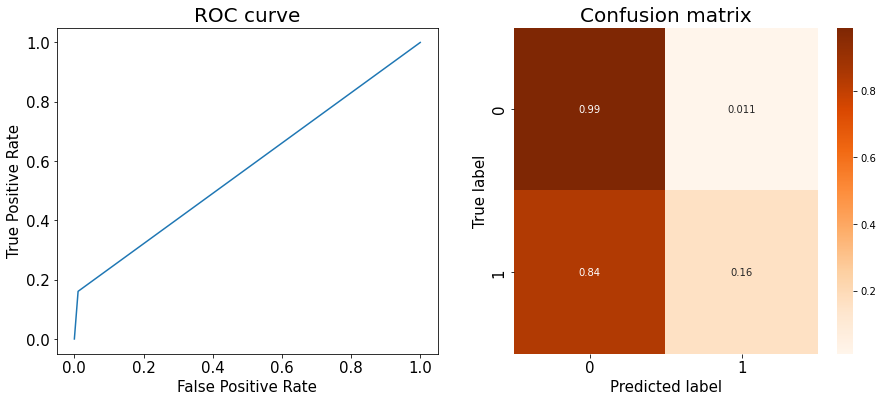

The optimal threshold is at 1.00
Accuracy score: 0.89
Precision score: 0.66
Recall score: 0.16
F1 score: 0.26
AUC score: 0.57
Error rate: 0.11
{'classifier__ccp_alpha': 0.005, 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt'}
{'classifier__ccp_alpha': 0.005, 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


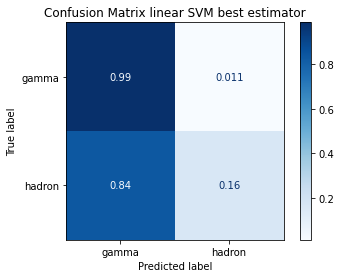

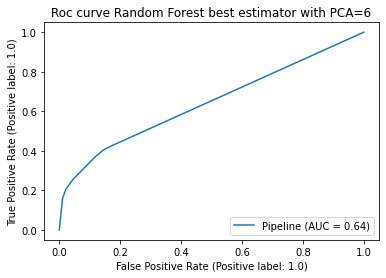

In [ ]:
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_no_pca.best_params_), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_clf_pca = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_pca.best_params_), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_clf_pca.fit(X_train_pca, y_train)
gs_clf_no_pca.fit(X_train_no_pca, y_train)

y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_clf_pca, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_pca.best_estimator_, X_test_preprocessed, y_test) 


y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_clf_no_pca, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 


print(gs_clf_no_pca.best_params_)
print(gs_clf_pca.best_params_)

###BACKWARD

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.58


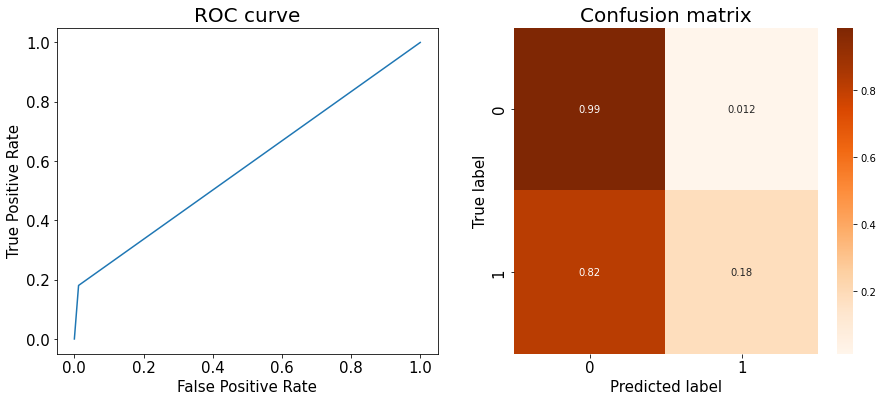

The optimal threshold is at 1.00
Accuracy score: 0.89
Precision score: 0.66
Recall score: 0.18
F1 score: 0.28
AUC score: 0.58
Error rate: 0.11


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

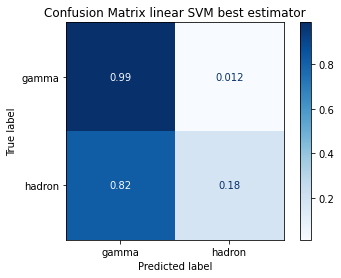

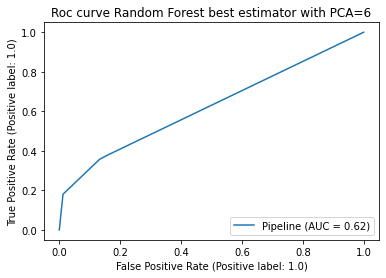

In [ ]:
# BACKWARD
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

### **Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier()
metric = 'roc_auc'
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_rf_no_pca = GridSearchCV(pipeline_clf, params_rf, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_rf_pca = GridSearchCV(pipeline_clf, params_rf, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)


In [ ]:
gs_rf_pca.fit(X_train_pca, y_train)
gs_rf_no_pca.fit(X_train_no_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        RandomForestClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [500]},
             scoring='f1', verbose=3)

The roc_auc score is 0.79


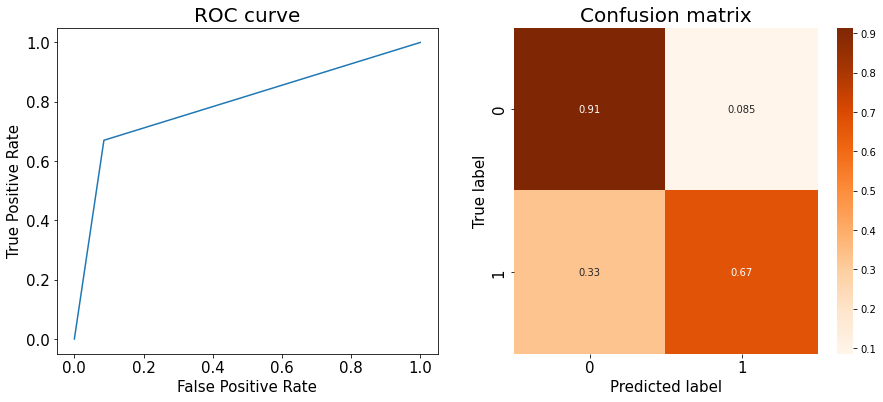

The optimal threshold is at 1.00
Accuracy score: 0.89
Precision score: 0.51
Recall score: 0.67
F1 score: 0.58
AUC score: 0.79
Error rate: 0.11


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.78


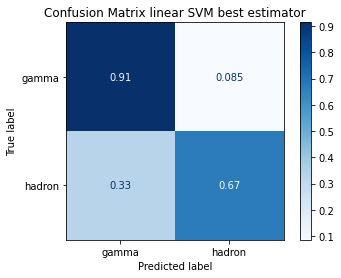

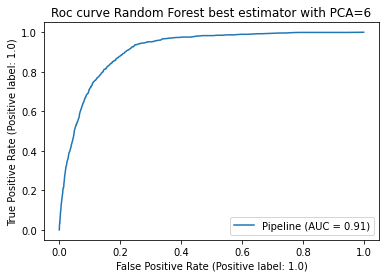

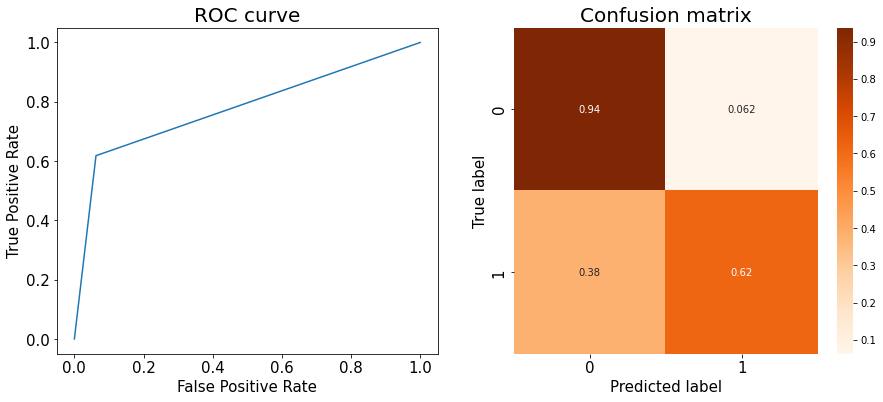

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.57
Recall score: 0.62
F1 score: 0.59
AUC score: 0.78
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

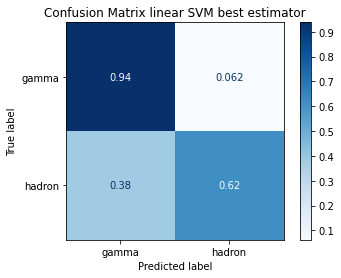

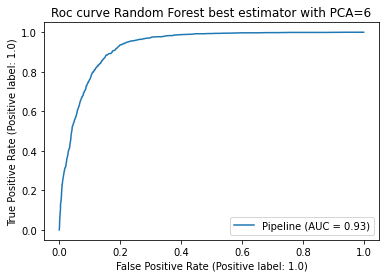

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_rf_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")
x = plot_roc_curve(gs_rf_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_rf_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")
x = plot_roc_curve(gs_rf_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

### BACKWARD

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The roc_auc score is 0.78


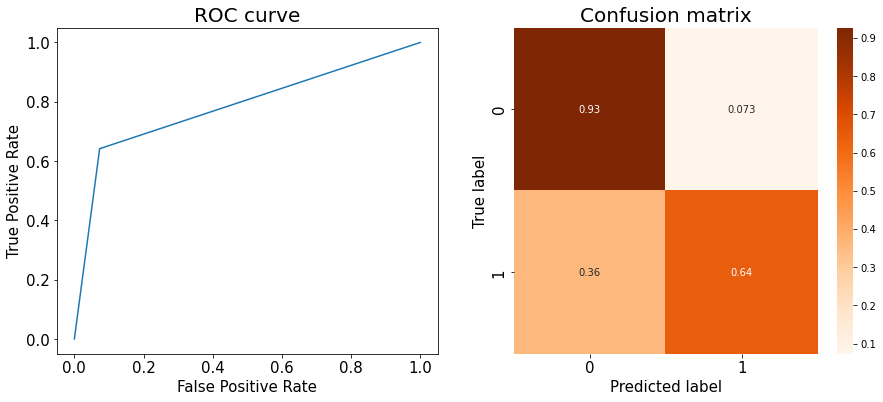

The optimal threshold is at 1.00
Accuracy score: 0.89
Precision score: 0.54
Recall score: 0.64
F1 score: 0.59
AUC score: 0.78
Error rate: 0.11


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

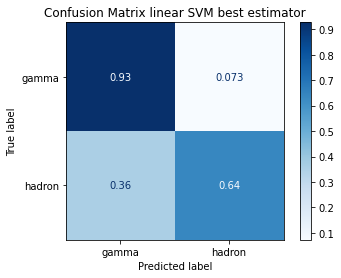

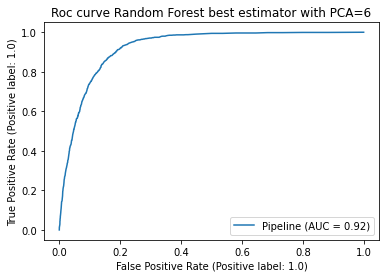

In [ ]:
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=params_rf, scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

In [ ]:
print(gs_rf_no_pca.best_params_)
print(gs_rf_pca.best_params_)

AttributeError: ignored

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.71


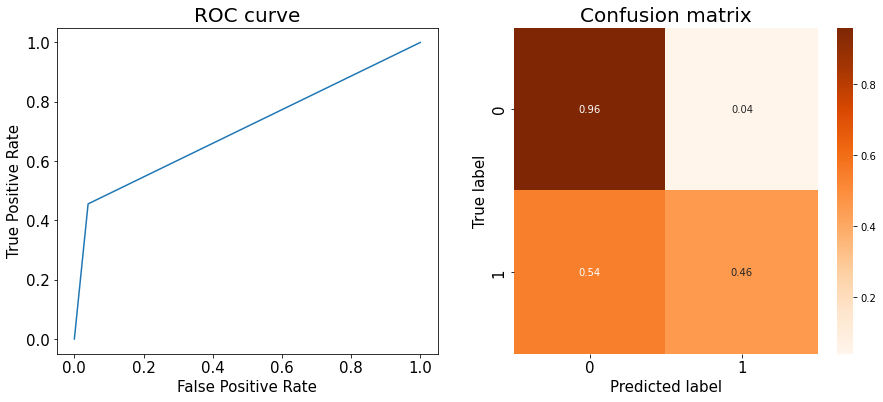

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.60
Recall score: 0.46
F1 score: 0.52
AUC score: 0.71
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.72


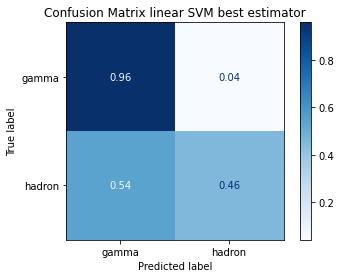

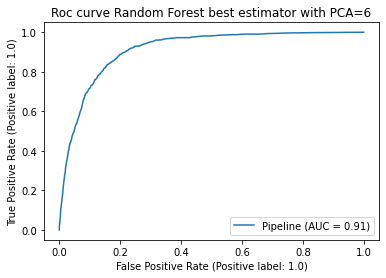

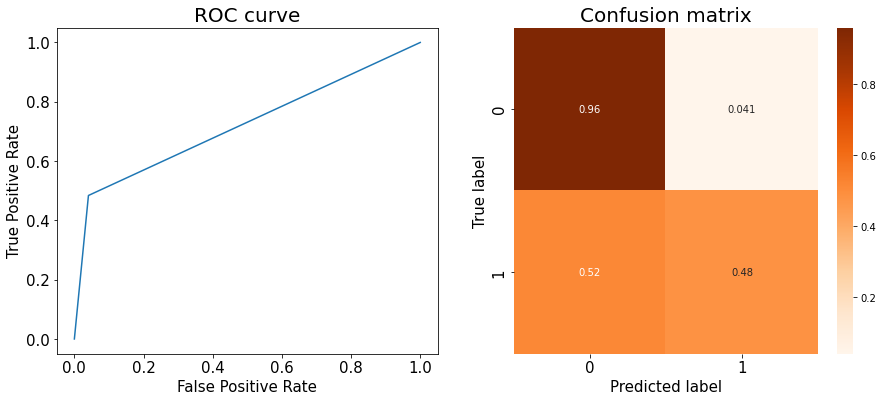

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.61
Recall score: 0.48
F1 score: 0.54
AUC score: 0.72
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

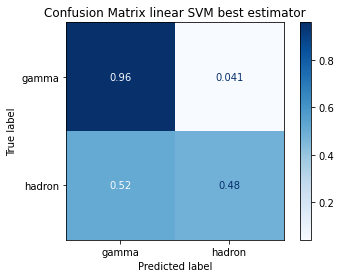

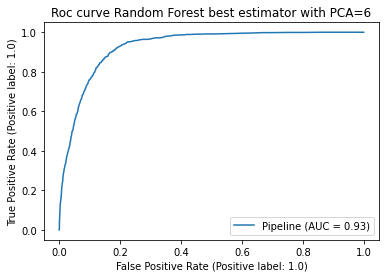

In [ ]:
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_rf_no_pca_random = GridSearchCV(pipeline_clf, param_grid=create_params(gs_rf_pca.best_params_), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_rf_pca_random = GridSearchCV(pipeline_clf, param_grid=create_params(gs_rf_no_pca.best_params_), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_rf_pca_random.fit(X_train_pca, y_train)
gs_rf_no_pca_random.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_rf_pca_random, metric='roc_auc')
y_pred_rf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")

x = plot_roc_curve(gs_rf_pca_random.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_rf_no_pca_random, metric='roc_auc')
y_pred_rf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")

x = plot_roc_curve(gs_rf_no_pca_random.best_estimator_, X_test_preprocessed_no_pca, y_test) 
plt.title('Roc curve Random Forest best estimator with PCA=6')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.74


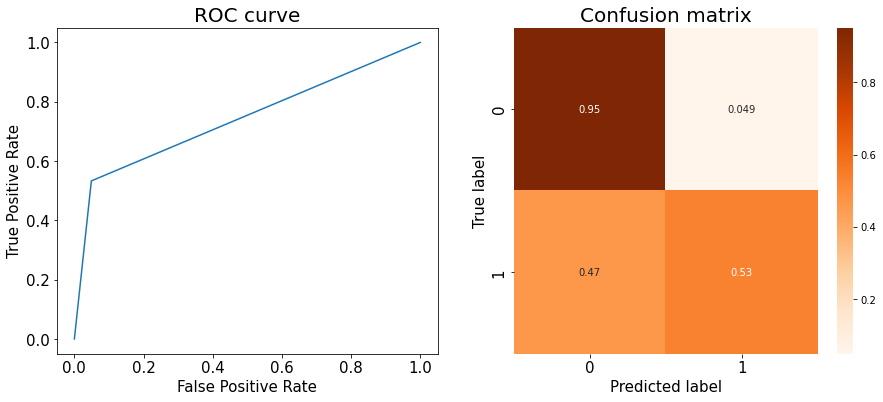

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.59
Recall score: 0.53
F1 score: 0.56
AUC score: 0.74
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

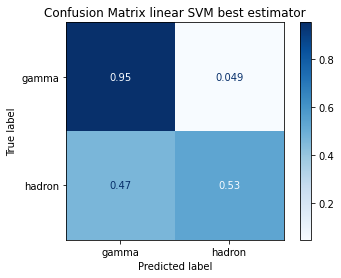

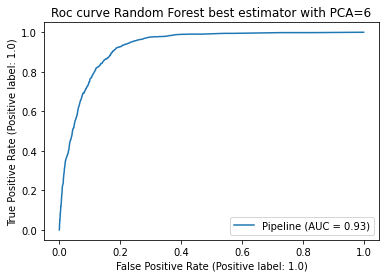

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Decision Tree Classifier")
disp_rf = plot_confusion_matrix(gs_clf_inter.best_estimator_, X_test_backward, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix linear SVM best estimator')
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 
plt.title('Roc curve Random Forest best estimator with PCA=6')

In [ ]:
best_params_rf ={'classifier__n_estimators':[500],
            'classifier__max_features':['sqrt'],
            'classifier__bootstrap': [True],
            'classifier__criterion':['entropy']}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.65


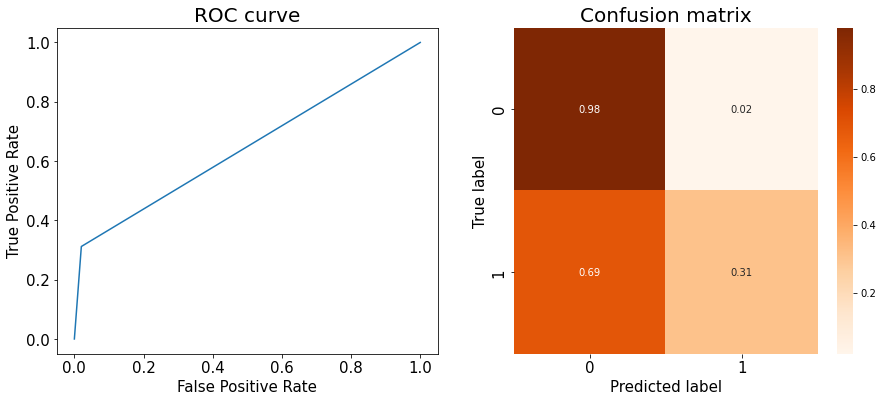

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.67
Recall score: 0.31
F1 score: 0.43
AUC score: 0.65
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.68


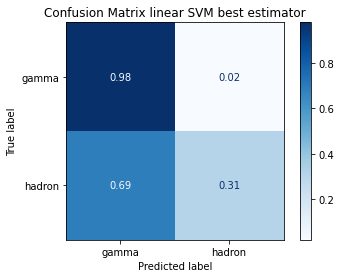

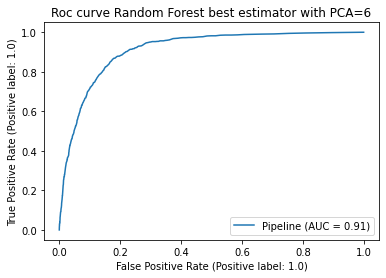

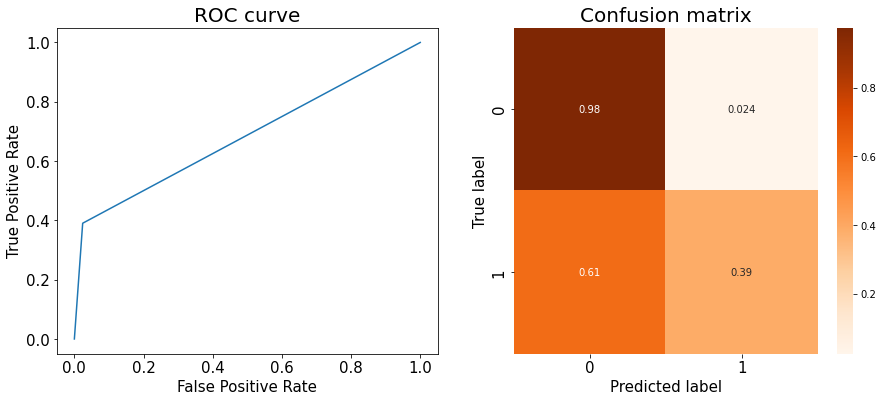

The optimal threshold is at 1.00
Accuracy score: 0.91
Precision score: 0.68
Recall score: 0.39
F1 score: 0.50
AUC score: 0.68
Error rate: 0.09


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

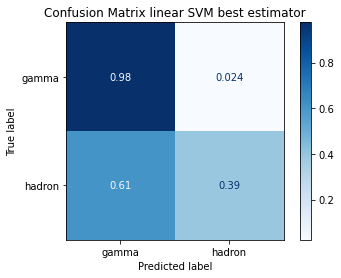

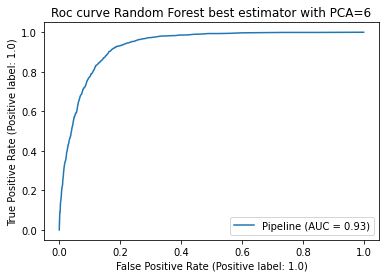

In [ ]:
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_rf_no_pca = GridSearchCV(pipeline_clf, param_grid=best_params_rf, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_rf_pca = GridSearchCV(pipeline_clf, param_grid=best_params_rf, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_rf_pca.fit(X_train_pca, y_train)
gs_rf_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_rf_pca, metric='roc_auc')
y_pred_rf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")

x = plot_roc_curve(gs_rf_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_rf_no_pca, metric='roc_auc')
y_pred_rf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")
x = plot_roc_curve(gs_rf_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.68


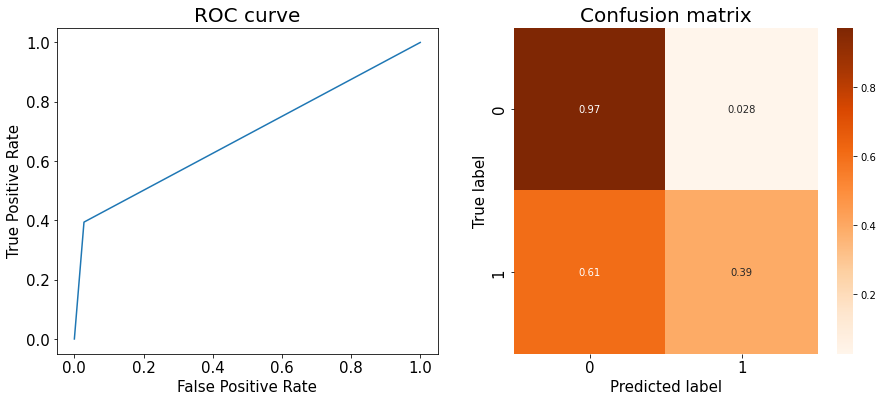

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.65
Recall score: 0.39
F1 score: 0.49
AUC score: 0.68
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

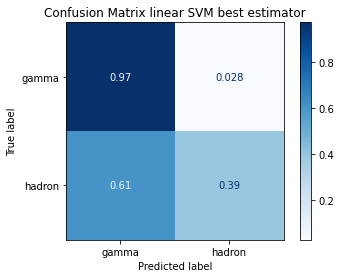

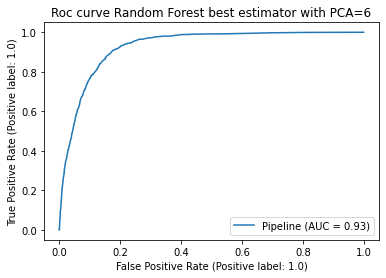

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Random Forest Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

### **Support-Vector Machine**

**TODO:** explain theory

In [ ]:
clf = SVC()
metric = 'roc_auc'
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_svm_no_pca = GridSearchCV(pipeline_clf, params_svm, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_svm_pca = GridSearchCV(pipeline_clf, params_svm, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)


In [ ]:
gs_svm_pca.fit(X_train_pca, y_train)
gs_svm_no_pca.fit(X_train_no_pca, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier', SVC()]]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.5, 1, 3],
                         'classifier__kernel': ['rbf']},
             scoring='f1', verbose=3)

The roc_auc score is 0.81


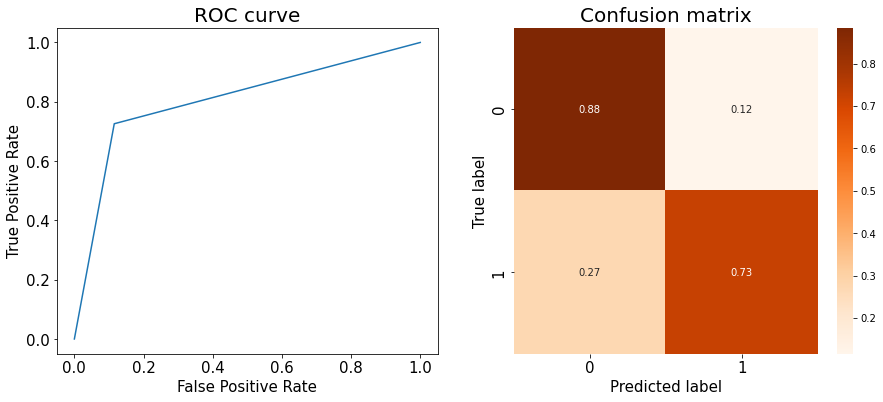

The optimal threshold is at 1.00
Accuracy score: 0.87
Precision score: 0.45
Recall score: 0.73
F1 score: 0.56
AUC score: 0.81
Error rate: 0.13


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.78


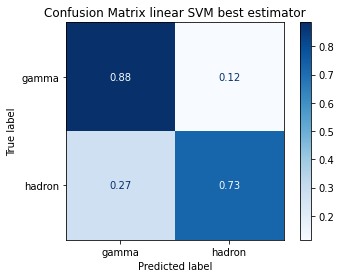

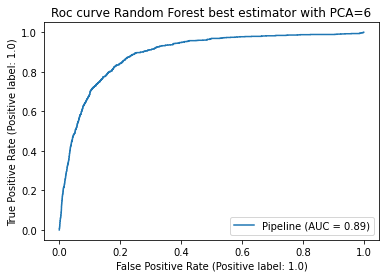

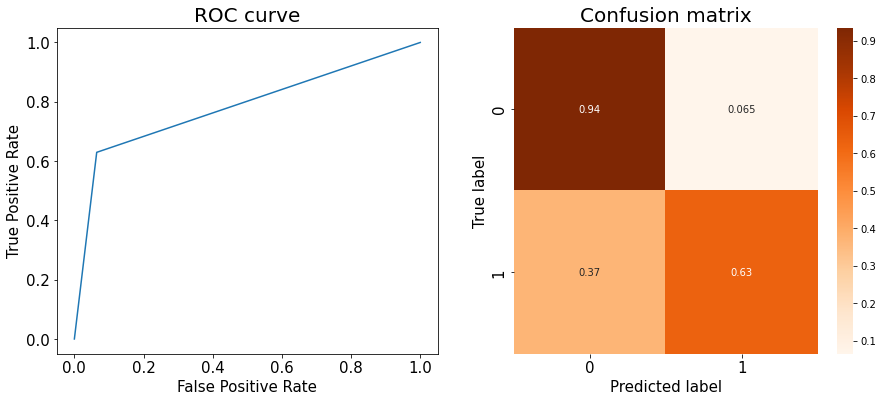

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.56
Recall score: 0.63
F1 score: 0.59
AUC score: 0.78
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

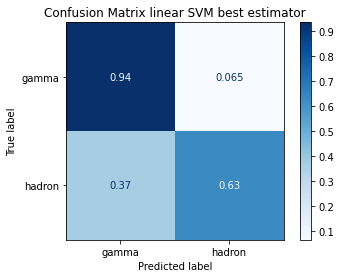

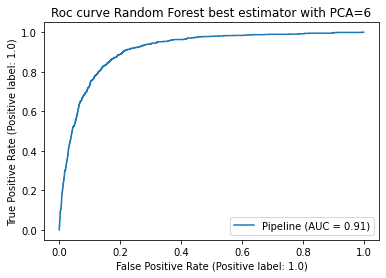

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_svm_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_svm_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_svm_no_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")

x = plot_roc_curve(gs_svm_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The roc_auc score is 0.84


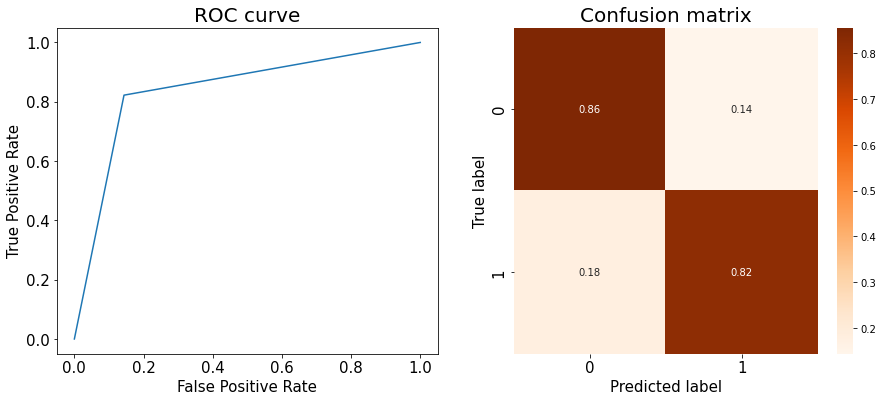

The optimal threshold is at 1.00
Accuracy score: 0.85
Precision score: 0.43
Recall score: 0.82
F1 score: 0.57
AUC score: 0.84
Error rate: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

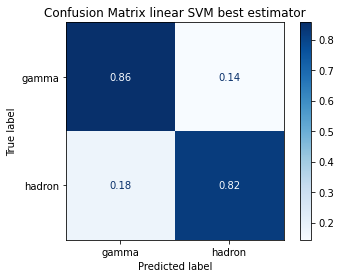

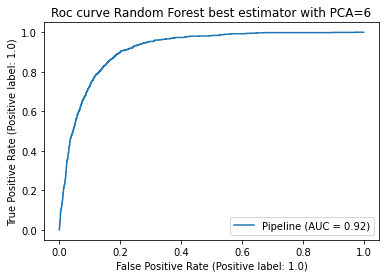

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=params_svm, scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Support VEctor Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

In [ ]:
print(gs_svm_no_pca.best_params_)
print(gs_svm_pca.best_params_)
best_params_svm_no_pca = gs_svm_no_pca.best_params_
best_params_svm_pca = gs_svm_pca.best_params_

{'classifier__C': 0.5, 'classifier__kernel': 'rbf'}
{'classifier__C': 3, 'classifier__kernel': 'rbf'}


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.83


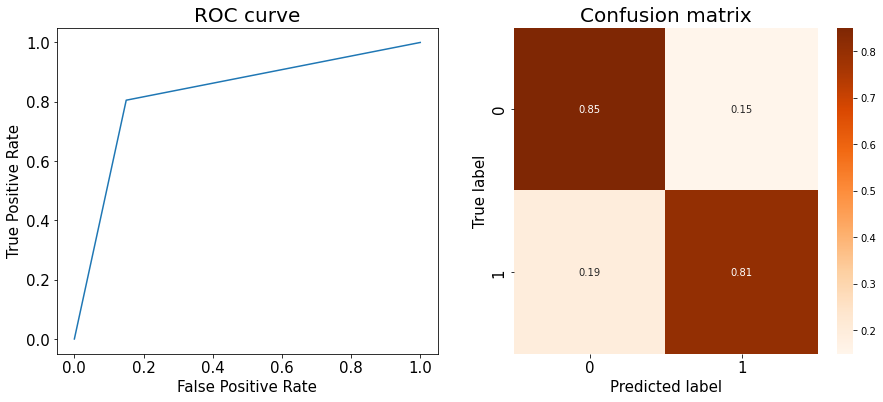

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.42
Recall score: 0.81
F1 score: 0.55
AUC score: 0.83
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.86


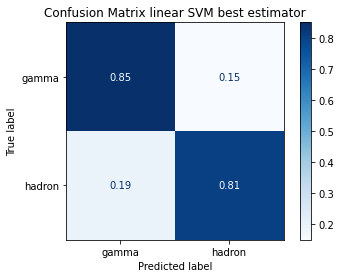

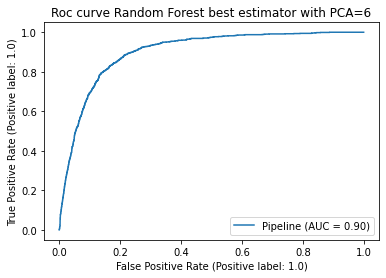

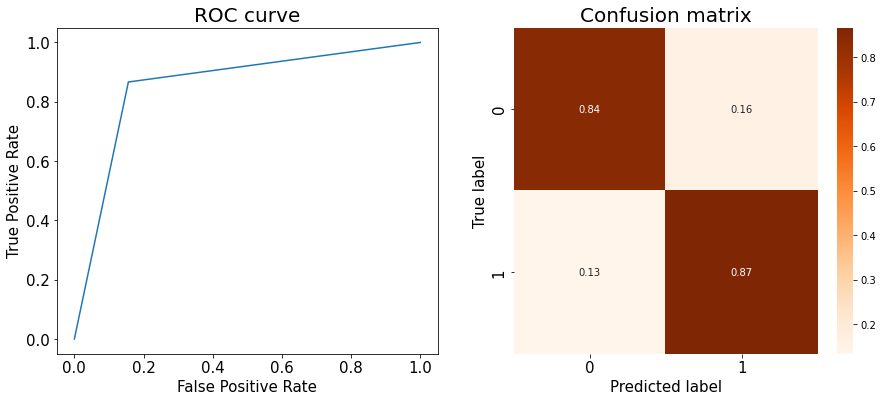

The optimal threshold is at 1.00
Accuracy score: 0.85
Precision score: 0.42
Recall score: 0.87
F1 score: 0.57
AUC score: 0.86
Error rate: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'classifier__C': 0.5, 'classifier__kernel': 'rbf'}
{'classifier__C': 3, 'classifier__kernel': 'rbf'}


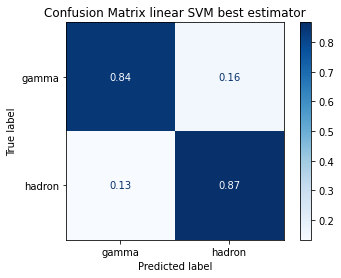

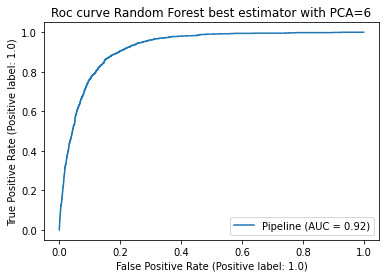

In [ ]:
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_svm_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_svm_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_svm_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_svm_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_svm_pca.fit(X_train_pca, y_train)
gs_svm_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_svm_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_svm_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_svm_no_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_svm_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 
print(gs_svm_no_pca.best_params_)
print(gs_svm_pca.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.8


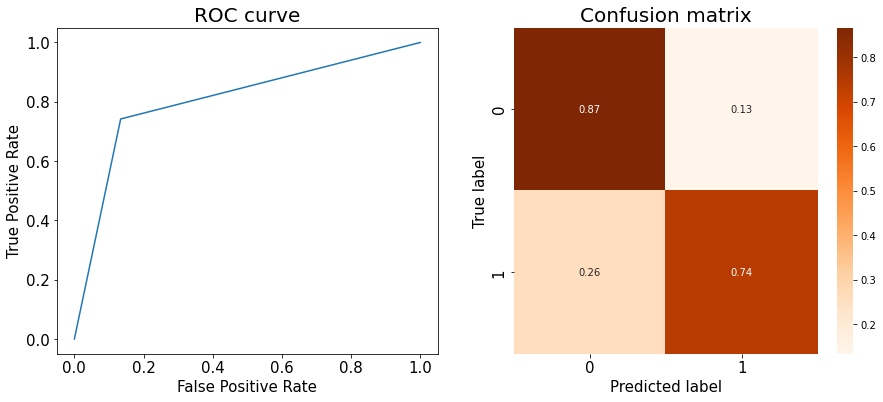

The optimal threshold is at 1.00
Accuracy score: 0.85
Precision score: 0.42
Recall score: 0.74
F1 score: 0.54
AUC score: 0.80
Error rate: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

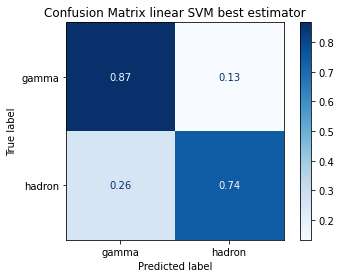

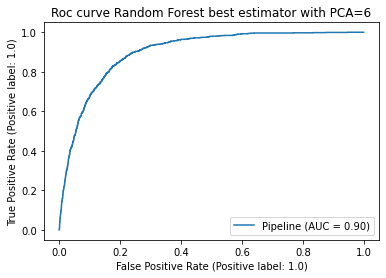

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.65


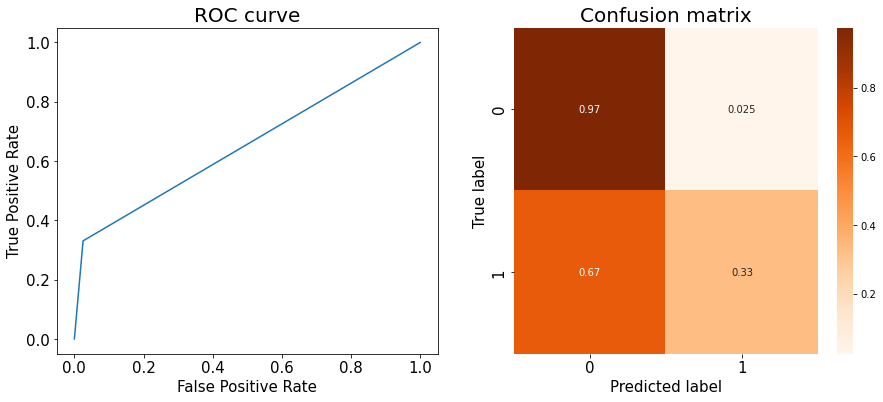

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.64
Recall score: 0.33
F1 score: 0.44
AUC score: 0.65
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.64


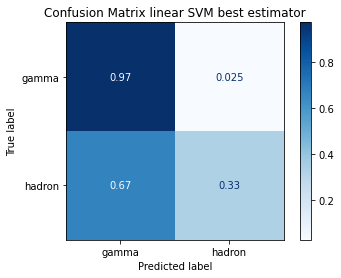

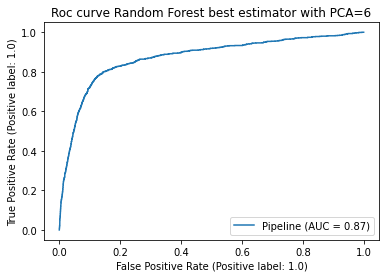

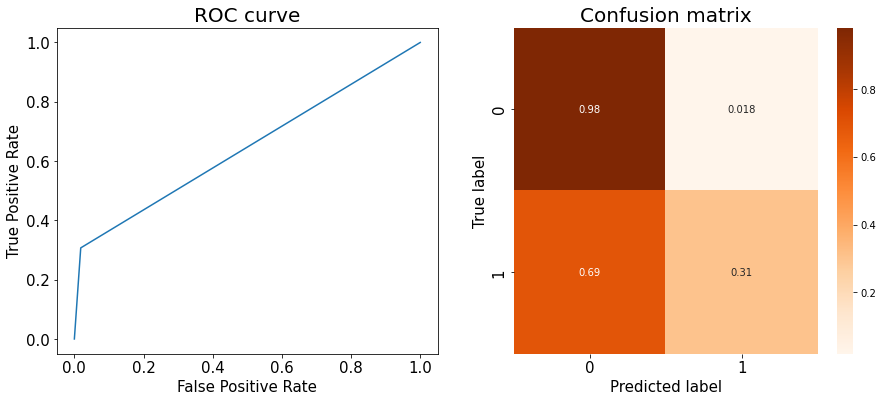

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.69
Recall score: 0.31
F1 score: 0.42
AUC score: 0.64
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


{'classifier__C': 0.5, 'classifier__kernel': 'rbf'}
{'classifier__C': 3, 'classifier__kernel': 'rbf'}


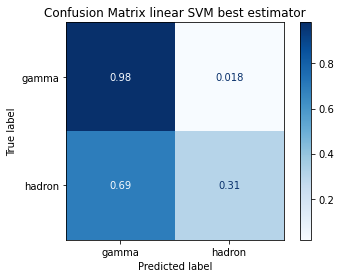

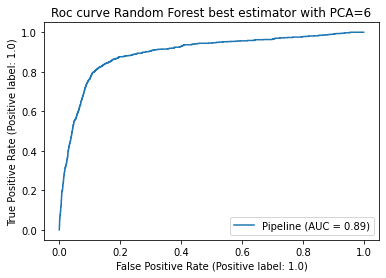

In [ ]:
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_svm_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_svm_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_svm_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_svm_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_svm_pca.fit(X_train_pca, y_train)
gs_svm_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_svm_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_svm_pca.best_estimator_, X_test_preprocessed, y_test) 
y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_svm_no_pca, metric='roc_auc')
y_pred_svc = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")

x = plot_roc_curve(gs_svm_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 
print(gs_svm_no_pca.best_params_)
print(gs_svm_pca.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.68


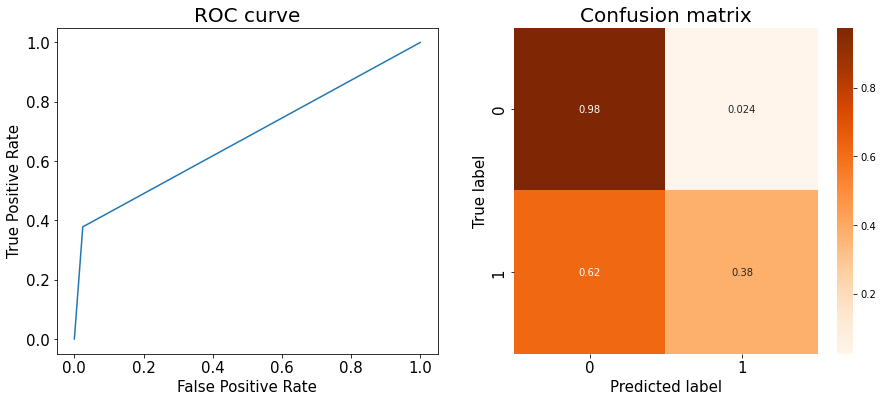

The optimal threshold is at 1.00
Accuracy score: 0.91
Precision score: 0.67
Recall score: 0.38
F1 score: 0.48
AUC score: 0.68
Error rate: 0.09


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

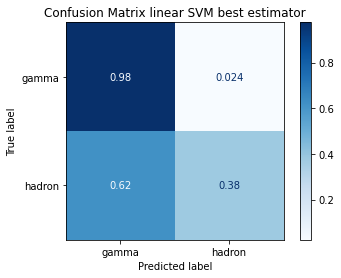

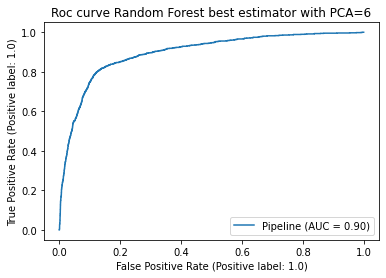

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")

x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

### **K-Nearest Neighbors**

**TODO:** explain theory

In [ ]:
clf = KNeighborsClassifier()
metric = 'roc_auc'
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_knn_no_pca = GridSearchCV(pipeline_clf, params_knn, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_knn_pca = GridSearchCV(pipeline_clf, params_knn, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)

In [ ]:
gs_knn_pca.fit(X_train_pca, y_train)
gs_knn_no_pca.fit(X_train_no_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier', KNeighborsClassifier()]]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [2, 5, 10],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

The roc_auc score is 0.8


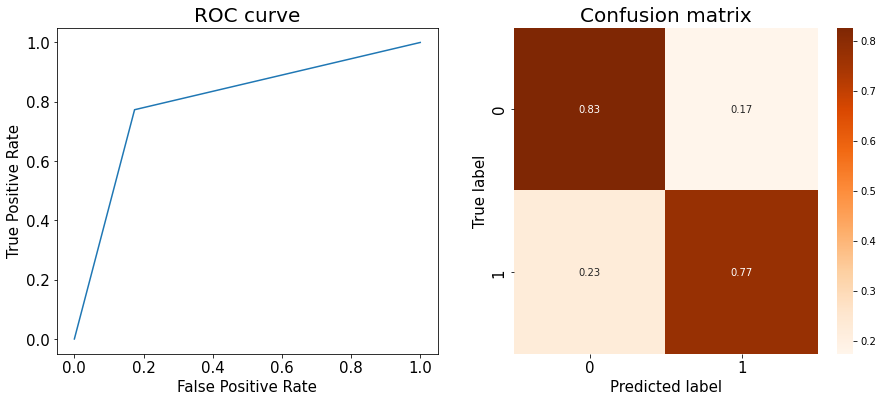

The optimal threshold is at 1.00
Accuracy score: 0.82
Precision score: 0.37
Recall score: 0.77
F1 score: 0.50
AUC score: 0.80
Error rate: 0.18


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.81


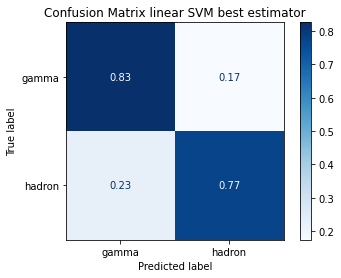

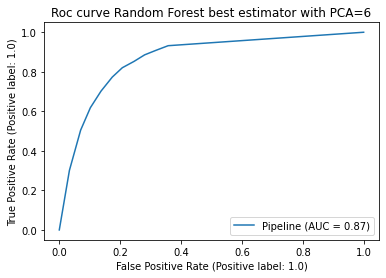

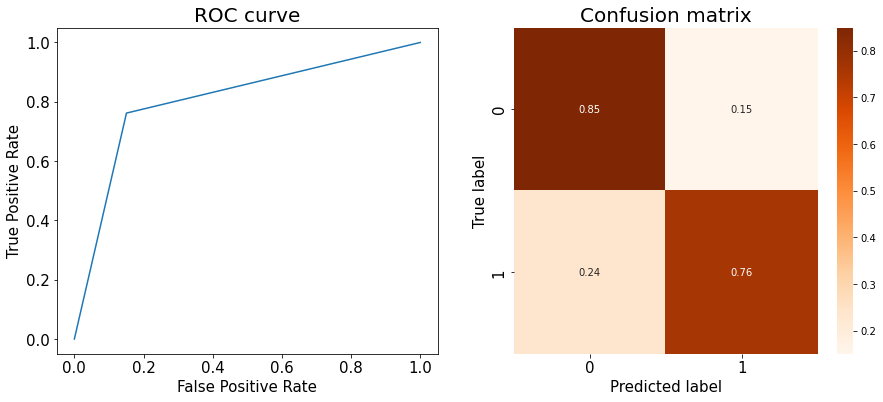

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.40
Recall score: 0.76
F1 score: 0.53
AUC score: 0.81
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

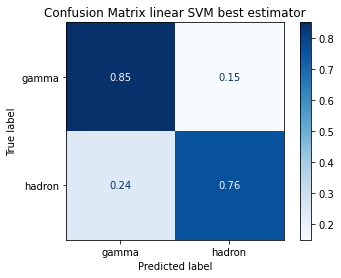

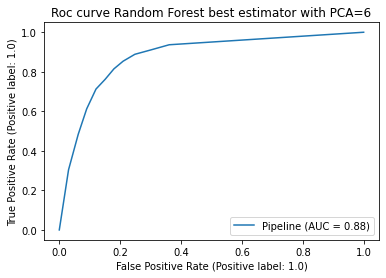

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_knn_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "K Nearest Neighbours Classifier")
x = plot_roc_curve(gs_knn_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_knn_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "K Nearest Neighbours Classifier")
x = plot_roc_curve(gs_knn_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The roc_auc score is 0.82


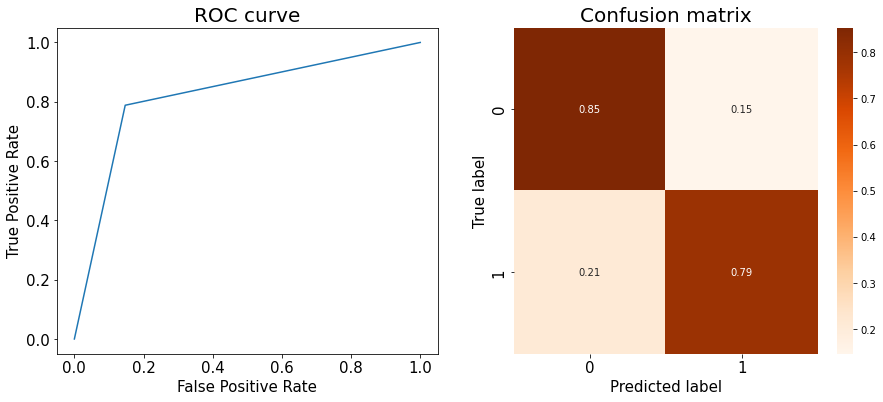

The optimal threshold is at 1.00
Accuracy score: 0.85
Precision score: 0.42
Recall score: 0.79
F1 score: 0.54
AUC score: 0.82
Error rate: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

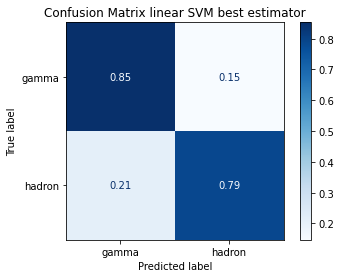

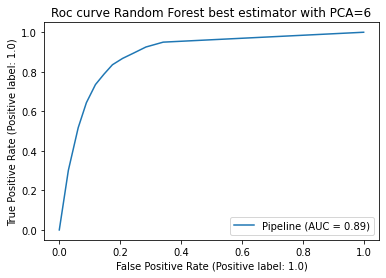

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=params_knn, scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "KNN Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

In [ ]:
print(gs_knn_no_pca.best_params_)
print(gs_knn_pca.best_params_)
best_params_knn_no_pca = gs_knn_no_pca.best_params_
best_params_knn_pca = gs_knn_pca.best_params_

{'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}
{'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.79


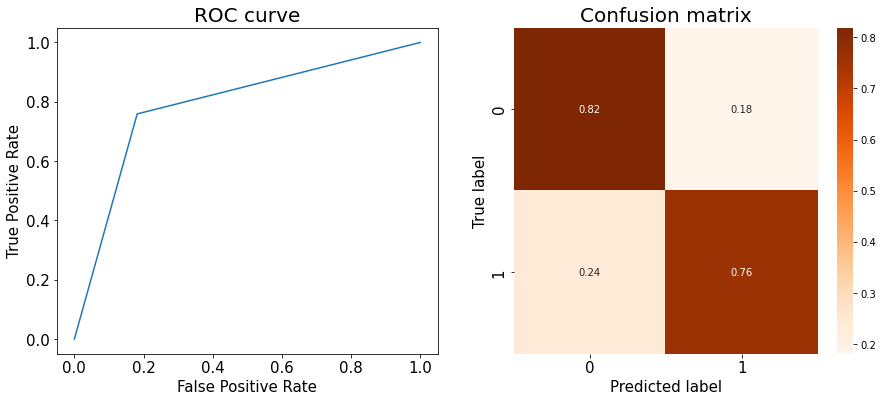

The optimal threshold is at 1.00
Accuracy score: 0.81
Precision score: 0.36
Recall score: 0.76
F1 score: 0.49
AUC score: 0.79
Error rate: 0.19


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.8


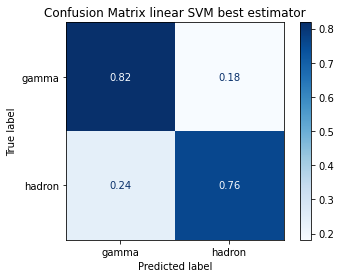

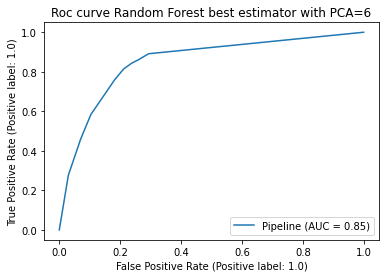

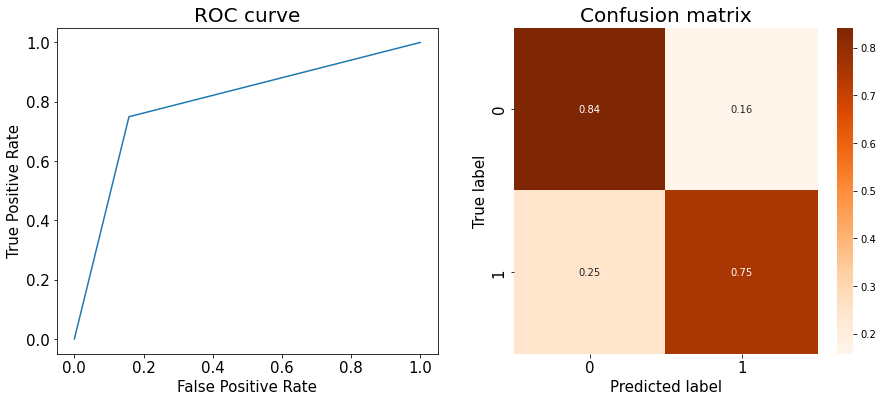

The optimal threshold is at 1.00
Accuracy score: 0.83
Precision score: 0.39
Recall score: 0.75
F1 score: 0.51
AUC score: 0.80
Error rate: 0.17


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

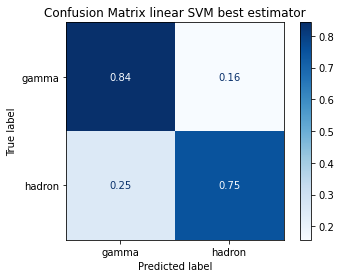

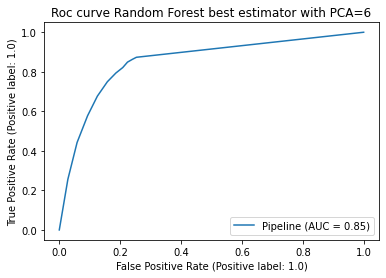

In [ ]:
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_knn_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_knn_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_knn_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_knn_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_knn_pca.fit(X_train_pca, y_train)
gs_knn_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_knn_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "K Nearest Neighbor Classifier")
x = plot_roc_curve(gs_knn_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_knn_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "K Nearest Neighbor Classifier")
x = plot_roc_curve(gs_knn_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.81


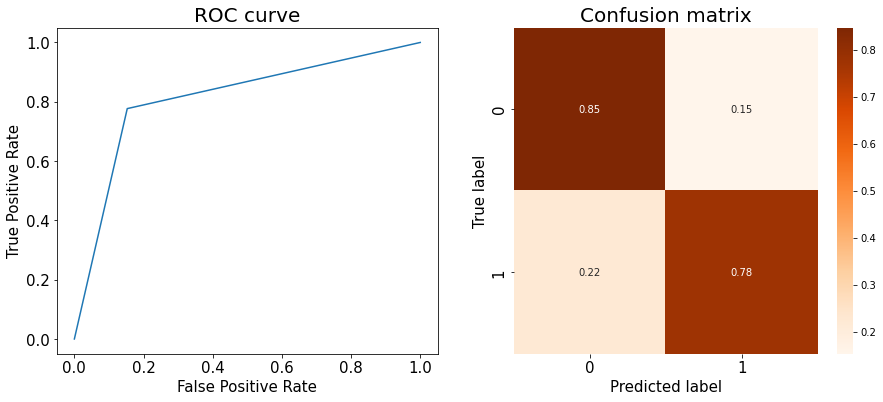

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.40
Recall score: 0.78
F1 score: 0.53
AUC score: 0.81
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

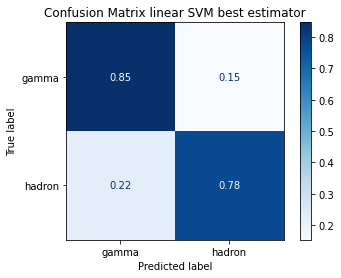

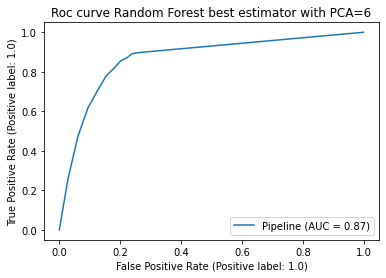

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.62


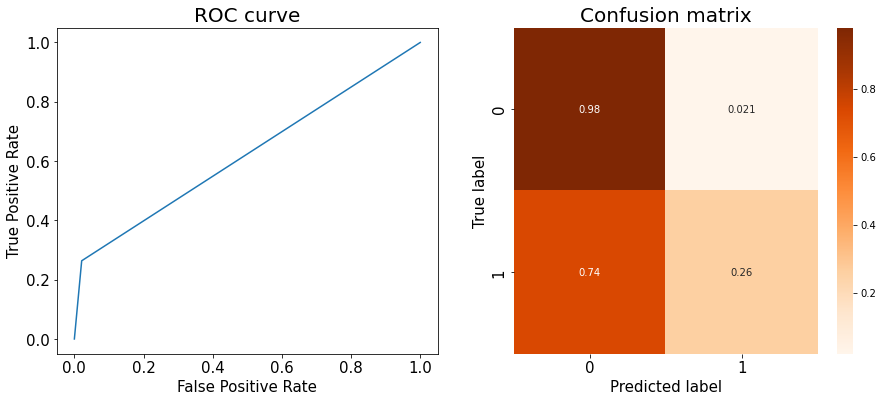

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.62
Recall score: 0.26
F1 score: 0.37
AUC score: 0.62
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


The roc_auc score is 0.63


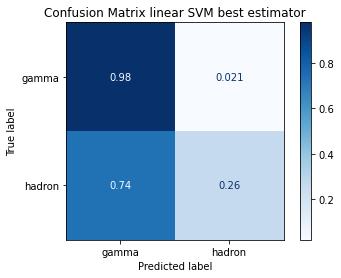

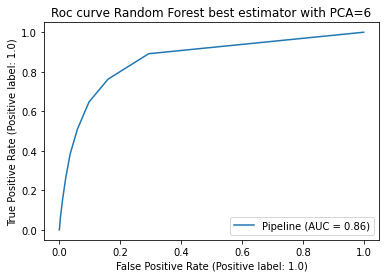

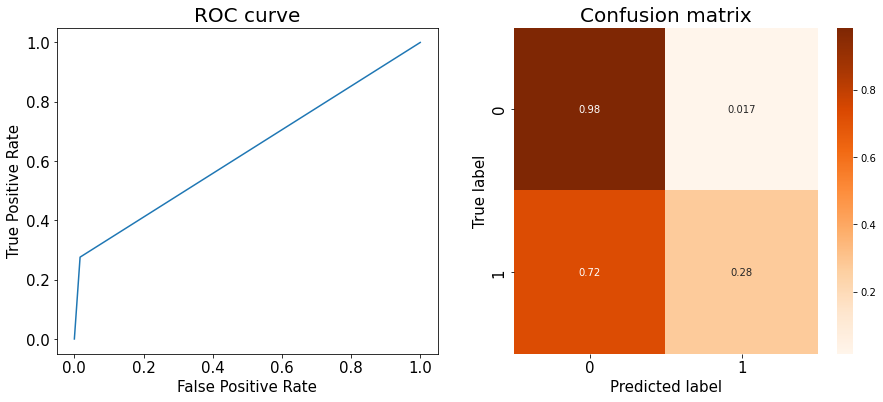

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.69
Recall score: 0.28
F1 score: 0.39
AUC score: 0.63
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

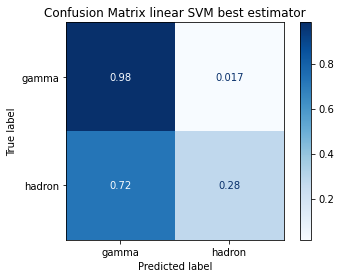

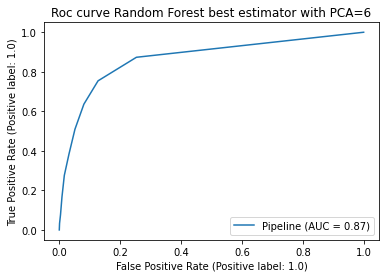

In [ ]:
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_knn_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_knn_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_knn_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_knn_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_knn_pca.fit(X_train_pca, y_train)
gs_knn_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_knn_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_knn_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_knn_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_knn_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.63


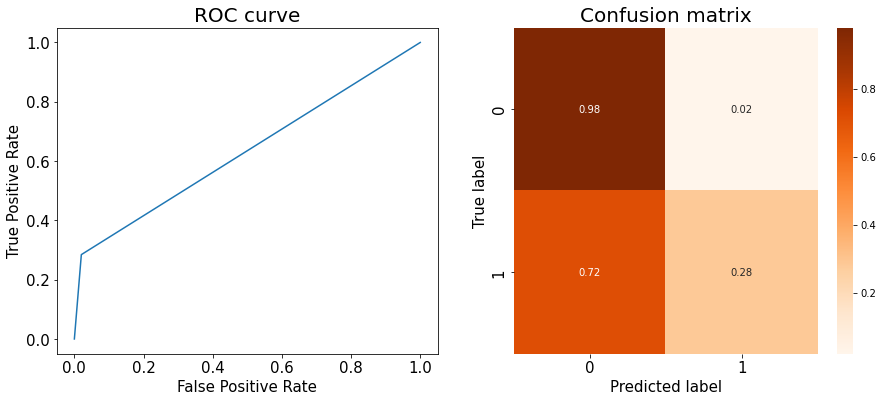

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.65
Recall score: 0.28
F1 score: 0.40
AUC score: 0.63
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

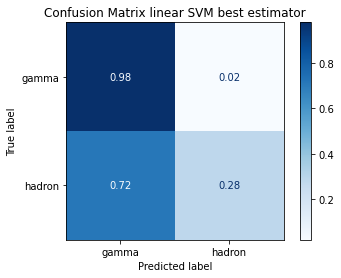

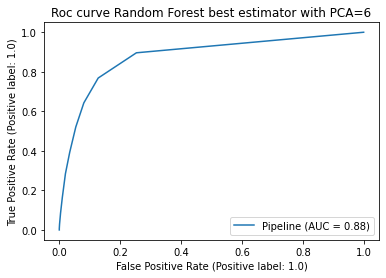

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Support Vector Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

### **Logistic Regression**

**TODO:** explain theory

In [ ]:
clf = LogisticRegression()
metric = 'roc_auc'
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_lr_no_pca = GridSearchCV(pipeline_clf, params_lr, scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_lr_pca = GridSearchCV(pipeline_clf, params_lr, scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)

In [ ]:
gs_lr_pca.fit(X_train_pca, y_train)
gs_lr_no_pca.fit(X_train_no_pca, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier', LogisticRegression()]]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.5, 1.0],
                         'classifier__penalty': ['l1', 'l2', 'elastic_net'],
                         'classifier__tol': [0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=3)

The roc_auc score is 0.81


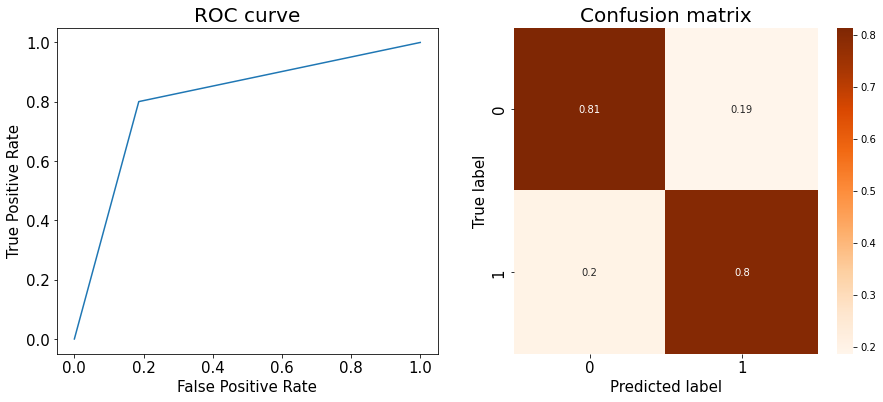

The optimal threshold is at 1.00
Accuracy score: 0.81
Precision score: 0.36
Recall score: 0.80
F1 score: 0.50
AUC score: 0.81
Error rate: 0.19
The roc_auc score is 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


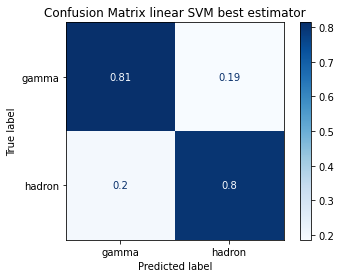

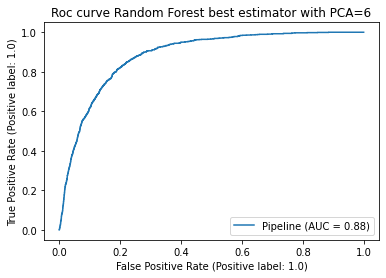

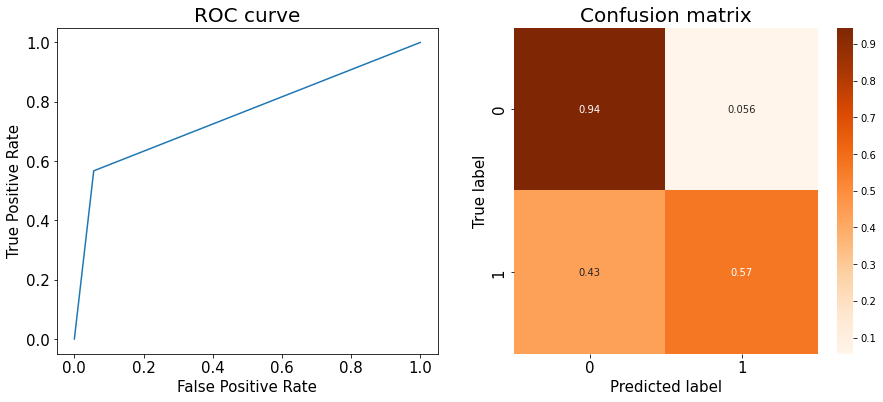

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.57
Recall score: 0.57
F1 score: 0.57
AUC score: 0.76
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

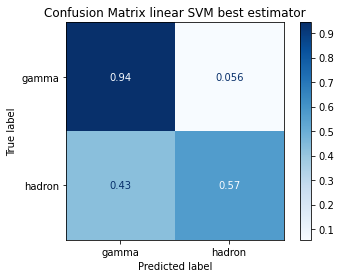

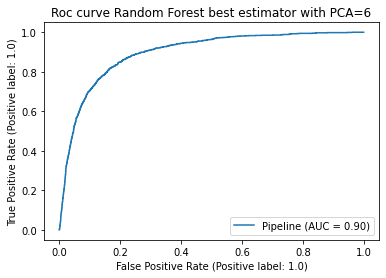

In [ ]:
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_lr_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_lr_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) s

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

The roc_auc score is 0.81


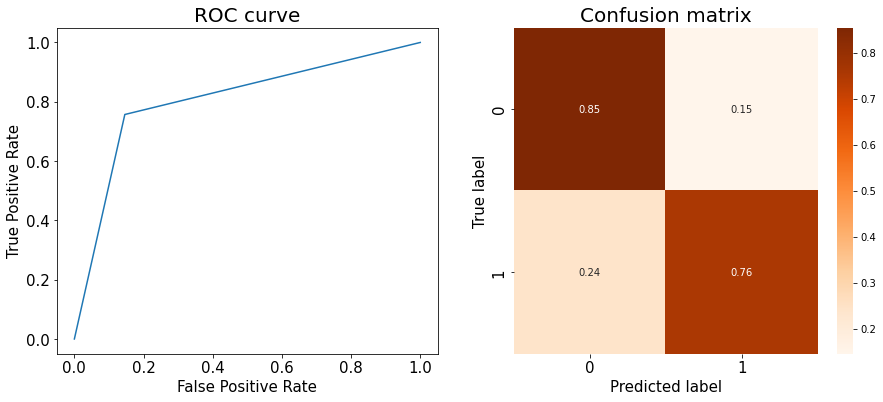

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.41
Recall score: 0.76
F1 score: 0.53
AUC score: 0.81
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

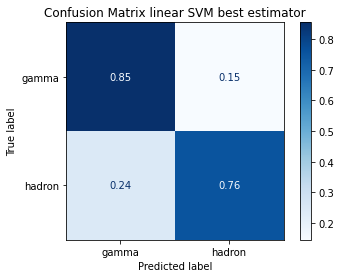

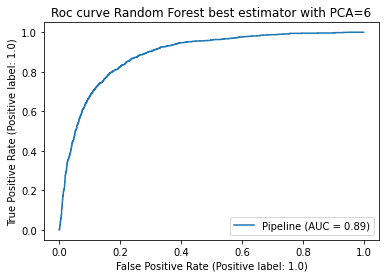

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=params_lr, scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

In [ ]:
print(gs_lr_no_pca.best_params_)
print(gs_lr_pca.best_params_)
best_params_lr_no_pca = gs_lr_no_pca.best_params_
best_params_lr_pca = gs_lr_pca.best_params_

{'classifier__C': 0.5, 'classifier__penalty': 'l2', 'classifier__tol': 0.0001}
{'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__tol': 1e-05}


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.81


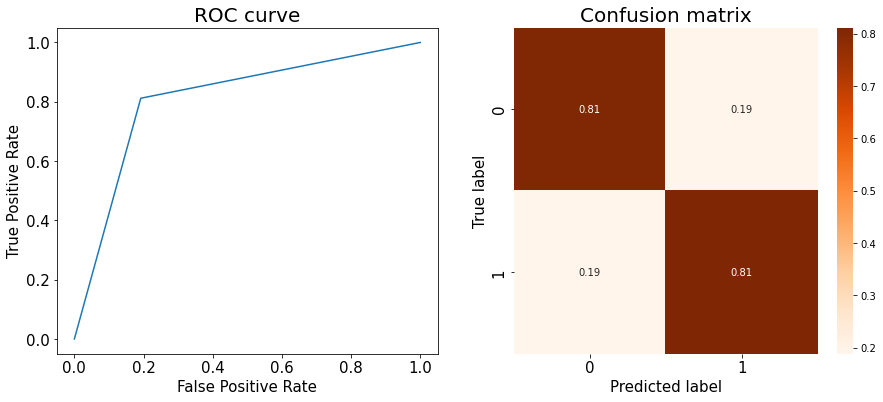

The optimal threshold is at 1.00
Accuracy score: 0.81
Precision score: 0.36
Recall score: 0.81
F1 score: 0.50
AUC score: 0.81
Error rate: 0.19
The roc_auc score is 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


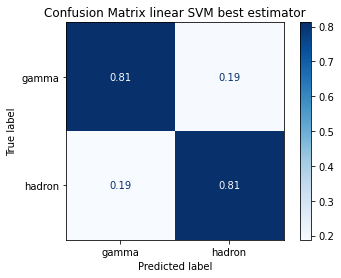

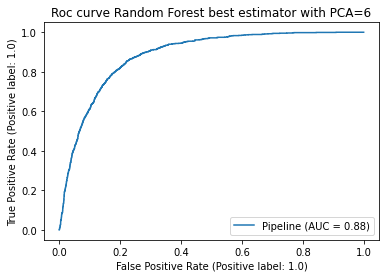

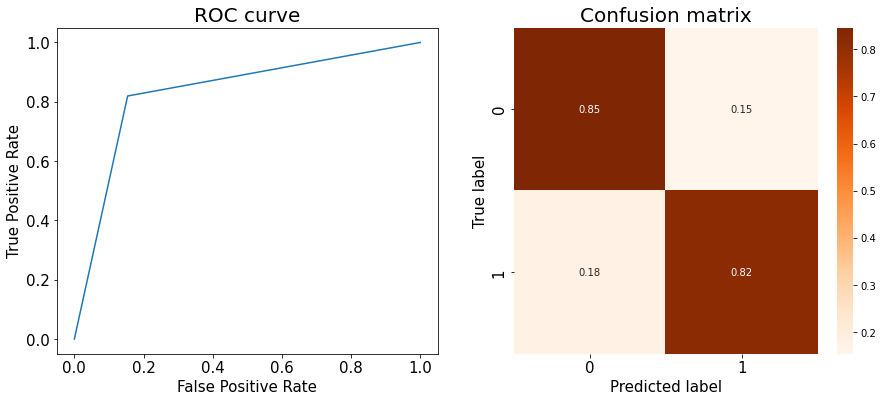

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.41
Recall score: 0.82
F1 score: 0.55
AUC score: 0.83
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

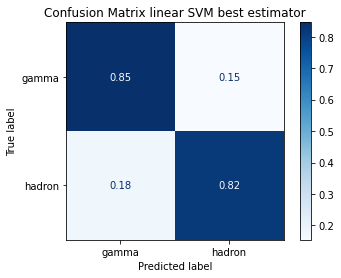

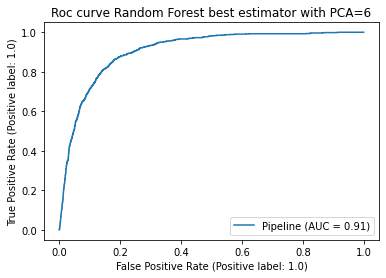

In [ ]:
pipeline_clf = imbpipeline(steps = [['random', RandomOverSampler()],
                                   ['classifier', clf]])
gs_lr_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_lr_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_lr_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_lr_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_lr_pca.fit(X_train_pca, y_train)
gs_lr_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_lr_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_lr_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.83


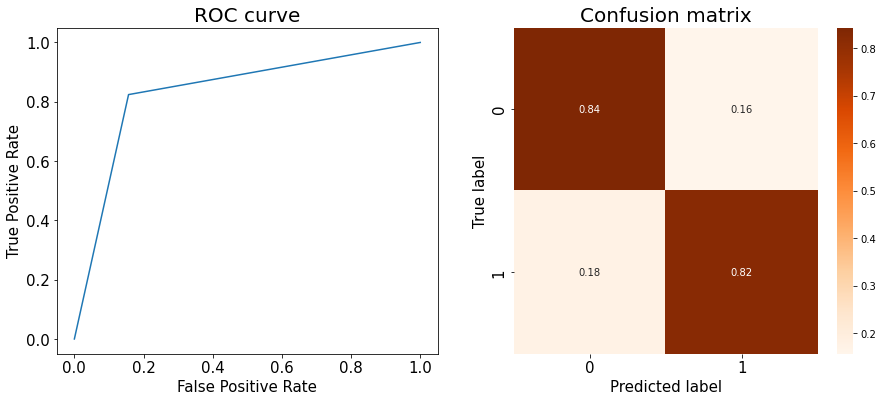

The optimal threshold is at 1.00
Accuracy score: 0.84
Precision score: 0.41
Recall score: 0.82
F1 score: 0.55
AUC score: 0.83
Error rate: 0.16


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

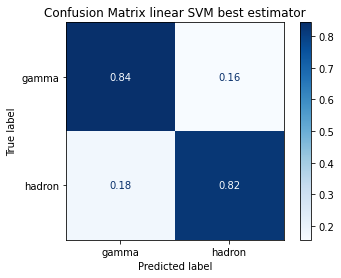

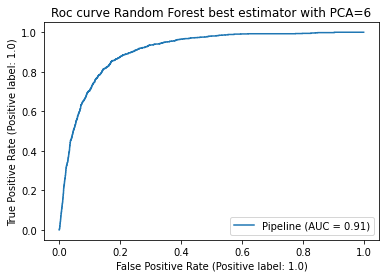

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [['smote', RandomOverSampler()],
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The roc_auc score is 0.63


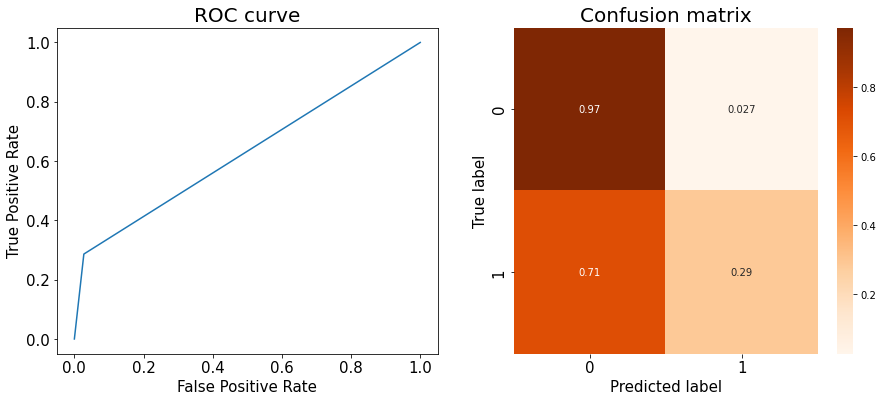

The optimal threshold is at 1.00
Accuracy score: 0.89
Precision score: 0.58
Recall score: 0.29
F1 score: 0.38
AUC score: 0.63
Error rate: 0.11
The roc_auc score is 0.67


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


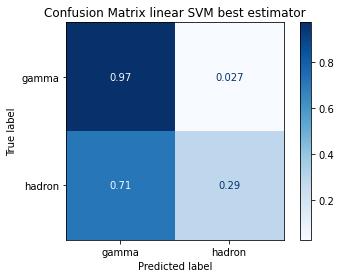

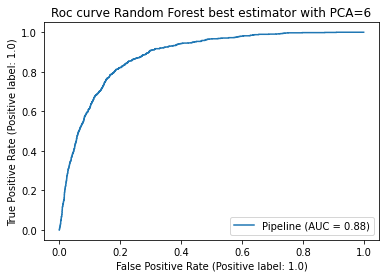

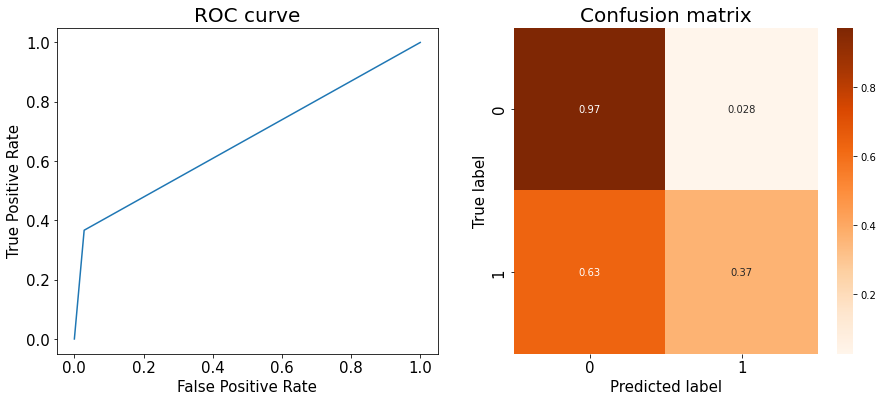

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.63
Recall score: 0.37
F1 score: 0.46
AUC score: 0.67
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

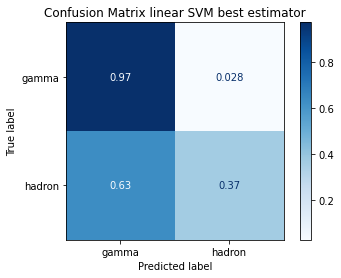

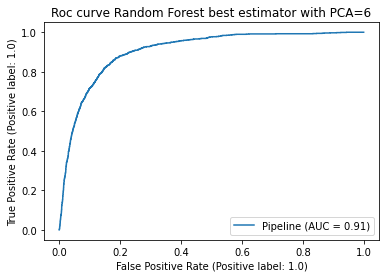

In [ ]:
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_lr_no_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_lr_no_pca), scoring='f1', n_jobs=-1, cv=no_pca_data, refit=True, verbose=3)
gs_lr_pca = GridSearchCV(pipeline_clf, param_grid=create_params(best_params_lr_pca), scoring='f1', n_jobs=-1, cv=pca_data, refit=True, verbose=3)
gs_lr_pca.fit(X_train_pca, y_train)
gs_lr_no_pca.fit(X_train_no_pca, y_train)
y_pred = evaluate_test_set(X_test_preprocessed, y_test, gs_lr_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_pca.best_estimator_, X_test_preprocessed, y_test) 

y_pred = evaluate_test_set(X_test_preprocessed_no_pca, y_test, gs_lr_no_pca, metric='roc_auc')
y_pred_tree = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_lr_no_pca.best_estimator_, X_test_preprocessed_no_pca, y_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The roc_auc score is 0.67


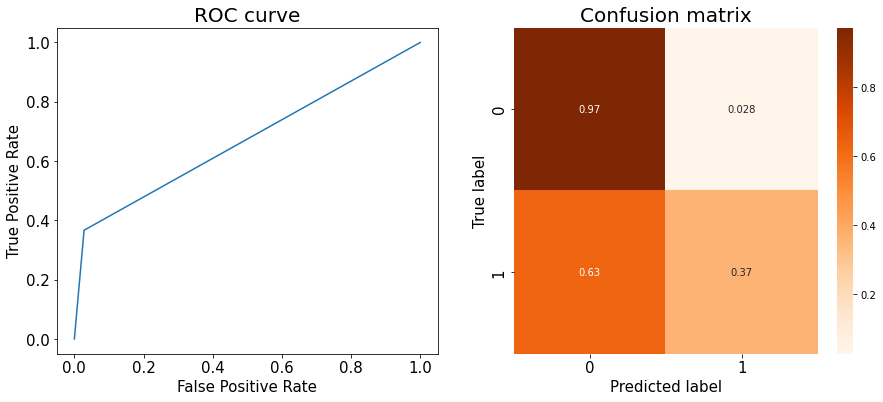

The optimal threshold is at 1.00
Accuracy score: 0.90
Precision score: 0.63
Recall score: 0.37
F1 score: 0.46
AUC score: 0.67
Error rate: 0.10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

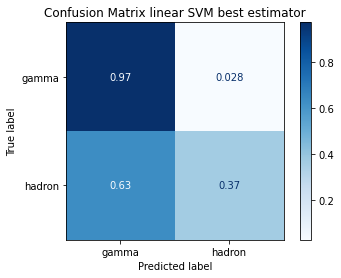

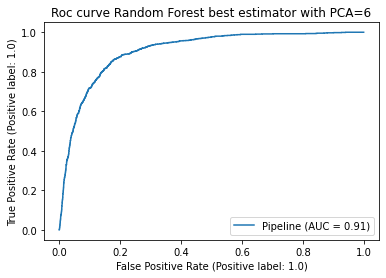

In [ ]:
### BACKWARD
# BACKWARD
pipeline_clf = imbpipeline(steps = [
                                   ['classifier', clf]])
gs_clf_inter = GridSearchCV(pipeline_clf, param_grid=create_params(gs_clf_inter.best_params_), scoring='f1', n_jobs=-1, cv=data_backed, refit=True, verbose=3)
gs_clf_inter.fit(X_train_backward, y_train)

y_pred = evaluate_test_set(X_test_backward, y_test, gs_clf_inter, metric='roc_auc')
y_pred_clf = roc_cm_scores_er(y_test, y_pred, "Logistic Regression Classifier")
x = plot_roc_curve(gs_clf_inter.best_estimator_, X_test_backward, y_test) 

### **Metropolis-Hastings**

In [ ]:
def logistic(z):
    return 1 / (1 + np.exp(-z))


def bernoulli_density(y, p):
    return y * np.log(p + 1e-10) + (1 - y) * np.log(1 - p + 1e-10)  # 1e-10 to avoid ill-posed expression


def gaussian_density(x, mean=0, var=1):
    return - 0.5 * (np.log(2 * np.pi * var) + (x - mean)**2 / var)


def logposterior(w, X, y):
    # get the prior
    prior = gaussian_density(w)
    p = logistic(X @ w)
    bern_log_lik = bernoulli_density(y, p)

    return np.sum(bern_log_lik) + np.sum(prior)


def rw_mh_step(w_prev, X, y, step_size):
    ws_tilde = np.random.multivariate_normal(w_prev, np.eye(len(w_prev)) * step_size)
    # now compute the ratio
    r = np.exp(logposterior(ws_tilde, X, y) - logposterior(w_prev, X, y))
    if r >= 1:
        return ws_tilde
    else:
        u = np.random.uniform(0,1)
        if u <= r:
            return ws_tilde
        else:
            return w_prev


def run_sampling(w, X, y, n_samples, step_size=1):
    w = np.atleast_1d(w)
    samples = np.empty((n_samples, *w.shape))
    for i in tqdm(range(n_samples), desc="MH"):
        w = rw_mh_step(w, X, y, step_size)
        samples[i] = w
    
    return samples




#

In [ ]:
Smoty = SMOTE()
Randy = RandomOverSampler()
X_train_pca_smote, y_train_pca_smote = Smoty.fit_resample(X_train_pca, y_train)
X_train_pca_random, y_train_pca_random = Randy.fit_resample(X_train_pca, y_train)

X_train_no_pca_smote, y_train_no_pca_smote = Smoty.fit_resample(X_train_no_pca, y_train)
X_train_no_pca_random, y_train_no_pca_random = Randy.fit_resample(X_train_no_pca, y_train)

X_train_backward_smote, y_train_backward_smote = Smoty.fit_resample(X_train_backward, y_train)
X_train_backward_random, y_train_backward_random = Randy.fit_resample(X_train_backward, y_train)

In [ ]:
w_init = np.random.rand((X_train_pca.shape[1]))
samples_pca_no_over = run_sampling(w_init, X_train_pca, y_train, n_samples=20000, step_size=0.001)

In [ ]:
w_init = np.random.rand((X_train_pca.shape[1]))
samples_pca_smote = run_sampling(w_init, X_train_pca_smote, y_train_pca_smote, n_samples=20000, step_size=0.001)

w_init = np.random.rand((X_train_pca.shape[1]))
samples_pca_random = run_sampling(w_init, X_train_pca_random, y_train_pca_random, n_samples=20000, step_size=0.001)

MH:   0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


MH:   0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
w_init = np.random.rand((X_train_no_pca.shape[1]))
samples_no_pca_no_over = run_sampling(w_init, X_train_no_pca, y_train, n_samples=20000, step_size=0.001)

MH:   0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [ ]:
w_init = np.random.rand((X_train_no_pca.shape[1]))
samples_no_pca_smote = run_sampling(w_init, X_train_no_pca_smote, y_train_no_pca_smote, n_samples=20000, step_size=0.001)

w_init = np.random.rand((X_train_no_pca.shape[1]))
samples_no_pca_random = run_sampling(w_init, X_train_no_pca_random, y_train_no_pca_random, n_samples=20000, step_size=0.001)

MH:   0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


MH:   0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
w_init = np.random.rand((X_train_backward.shape[1]))
samples_back_no_over = run_sampling(w_init, X_train_backward, y_train, n_samples=20000, step_size=0.001)

MH:   0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [ ]:
w_init = np.random.rand((X_train_backward.shape[1]))
samples_back_smote = run_sampling(w_init, X_train_backward_smote, y_train_backward_smote, n_samples=20000, step_size=0.001)

w_init = np.random.rand((X_train_backward.shape[1]))
samples_back_random = run_sampling(w_init, X_train_backward_random, y_train_backward_random, n_samples=20000, step_size=0.001)

MH:   0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


MH:   0%|          | 0/20000 [00:00<?, ?it/s]

We can plot some traces:

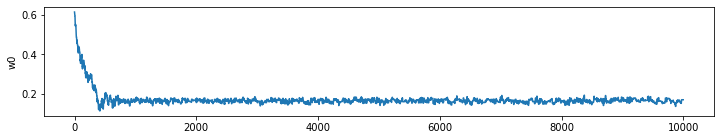

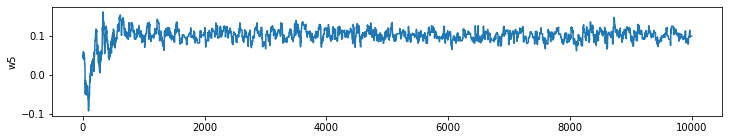

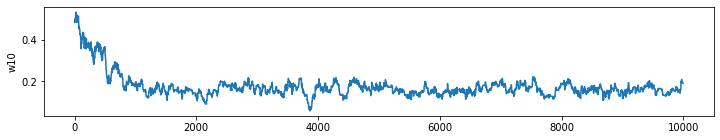

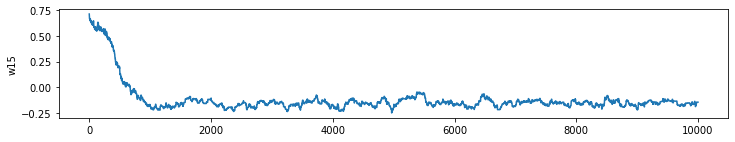

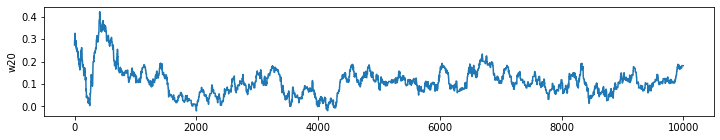

In [ ]:
wi = np.arange(stop=21, step=5)  # plot 4 traces
for i in wi:
    plt.figure(figsize=(12,2))
    plt.plot(list(range(0, samples_pca_no_over.shape[0])), samples_pca_no_over[:, i])
    plt.ylabel(f"w{i}")
    plt.show()

In [ ]:
def predict_mh(X, samples):
    return 1 / samples.shape[0] * np.sum(logistic(samples @ X.T), axis=0)  # approximated


def error_rate(y, y_pred):
    return (y != y_pred).sum() / len(y)




Now we can make predictions with MH:

## No oversampling

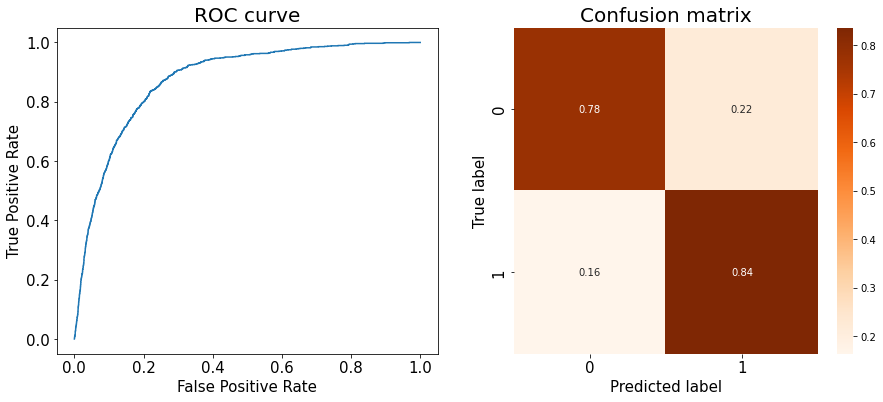

The optimal threshold is at 0.56
Accuracy score: 0.79
Precision score: 0.33
Recall score: 0.84
F1 score: 0.48
AUC score: 0.81
Error rate: 0.21


In [ ]:
y_pred = predict_mh(X_test_preprocessed, samples_pca_no_over)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

In [ ]:
samples_no_pca_no_over.shape

(20000, 30)

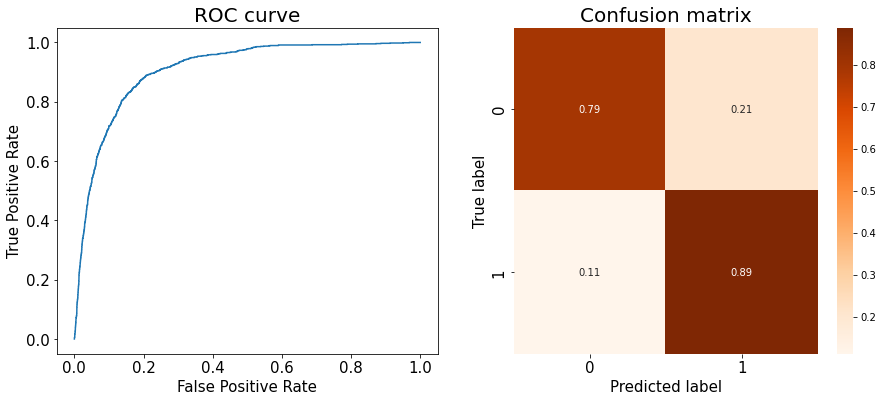

The optimal threshold is at 0.10
Accuracy score: 0.80
Precision score: 0.36
Recall score: 0.89
F1 score: 0.52
AUC score: 0.84
Error rate: 0.20


In [ ]:
y_pred = predict_mh(X_test_preprocessed_no_pca, samples_no_pca_no_over)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

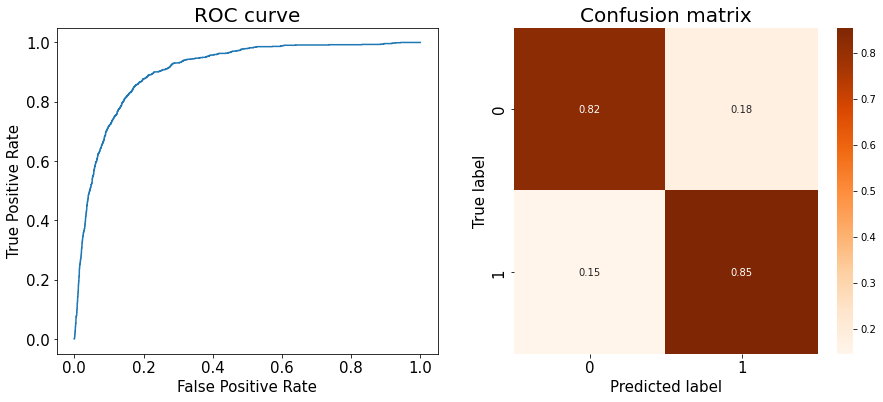

The optimal threshold is at 0.11
Accuracy score: 0.83
Precision score: 0.39
Recall score: 0.85
F1 score: 0.54
AUC score: 0.84
Error rate: 0.17


In [ ]:
y_pred = predict_mh(X_test_backward, samples_back_no_over)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

## SMOTE

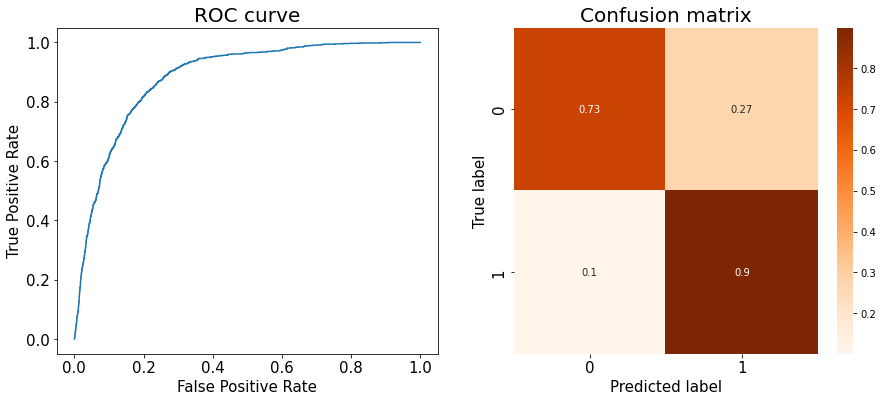

The optimal threshold is at 0.58
Accuracy score: 0.75
Precision score: 0.30
Recall score: 0.90
F1 score: 0.45
AUC score: 0.81
Error rate: 0.25


In [ ]:
y_pred = predict_mh(X_test_preprocessed, samples_pca_smote)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

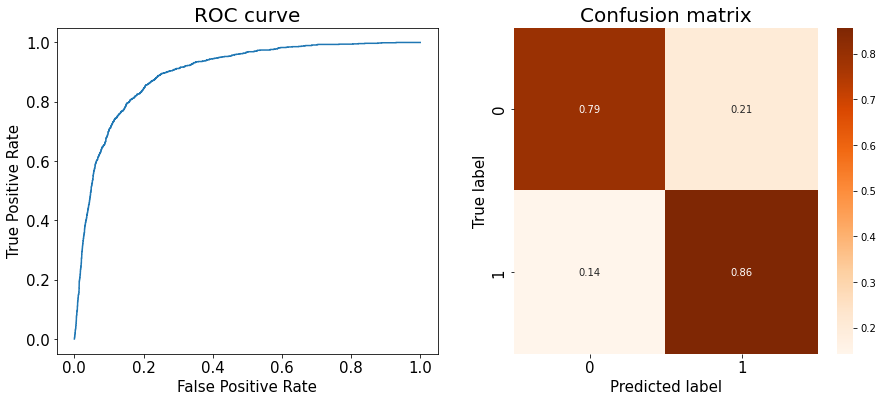

The optimal threshold is at 0.26
Accuracy score: 0.80
Precision score: 0.35
Recall score: 0.86
F1 score: 0.50
AUC score: 0.83
Error rate: 0.20


In [ ]:
y_pred = predict_mh(X_test_preprocessed_no_pca, samples_no_pca_smote)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

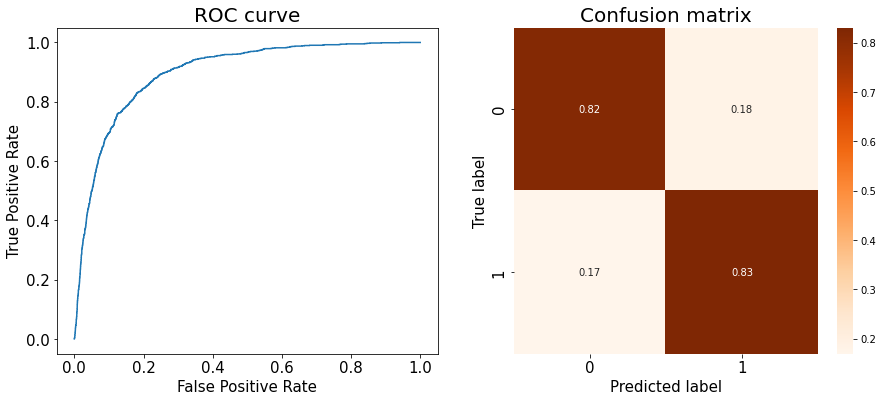

The optimal threshold is at 0.41
Accuracy score: 0.82
Precision score: 0.38
Recall score: 0.83
F1 score: 0.52
AUC score: 0.82
Error rate: 0.18


In [ ]:
y_pred = predict_mh(X_test_backward, samples_back_smote)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

## Random

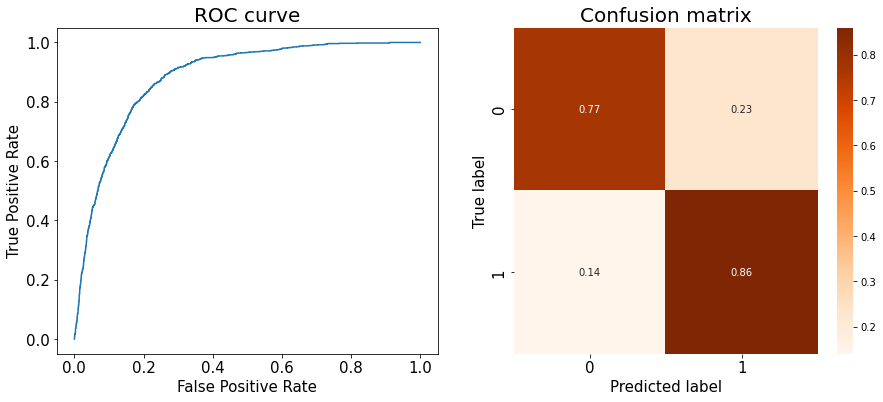

The optimal threshold is at 0.62
Accuracy score: 0.78
Precision score: 0.33
Recall score: 0.86
F1 score: 0.48
AUC score: 0.81
Error rate: 0.22


In [ ]:
y_pred = predict_mh(X_test_preprocessed, samples_pca_random)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

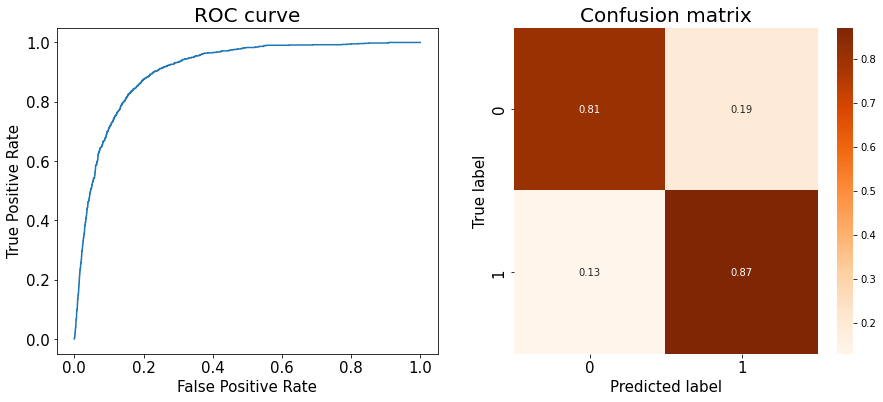

The optimal threshold is at 0.43
Accuracy score: 0.81
Precision score: 0.37
Recall score: 0.87
F1 score: 0.52
AUC score: 0.84
Error rate: 0.19


In [ ]:
y_pred = predict_mh(X_test_preprocessed_no_pca, samples_no_pca_random)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")

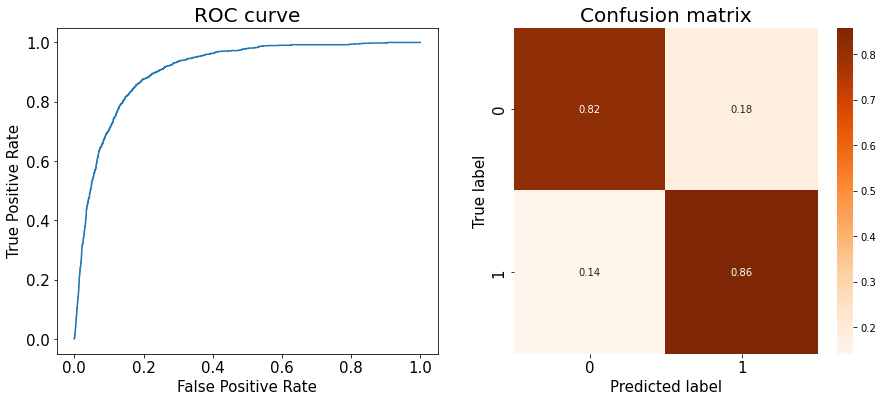

The optimal threshold is at 0.45
Accuracy score: 0.82
Precision score: 0.39
Recall score: 0.86
F1 score: 0.53
AUC score: 0.84
Error rate: 0.18


In [ ]:
y_pred = predict_mh(X_test_backward, samples_back_random)
y_pred_map_mh = roc_cm_scores_er(y_test, y_pred, "Bayesian Logistic Regression - MH PCA No Oversampling")